## Exploratory Data Analysis (EDA)

##### It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand,before getting them dirty with it. So here basically i perform Univariate and Bivariate Analysis of every features with various plot and try to find out more information from the data.

##### In our case, some features were recorded after the loan approved. Such features are not available to the user in reality when he is predicting default. Thus, these features must be eliminated and must not be included as part of the prediction model and here i also drop any feature with more than 50% of missing values and and perform EDA on remaining Features.

##### After eleminating those unnecessary features my remain fearures are 
##### Final_fearures ='id','member_id','addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code'

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Orginal dataset has almost 23 lakh records here i took only 50K records for easy data manipulation

#for i,chunk in enumerate(pd.read_csv('accepted_2007_to_2018Q4.csv', chunksize=50000)):
    #chunk.to_csv('chunk{}.csv'.format(i), index=False)

In [3]:
df=pd.read_csv('aceptchunk0.csv',low_memory=False)
pd.set_option('display.max_columns',151)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [5]:
df['loan_status'].value_counts()

Fully Paid            34978
Charged Off            9027
Current                5610
Late (31-120 days)      246
In Grace Period         100
Late (16-30 days)        38
Default                   1
Name: loan_status, dtype: int64

In [6]:
df.shape

(50000, 151)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 151 entries, id to settlement_term
dtypes: float64(114), int64(1), object(36)
memory usage: 57.6+ MB


In [8]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,5.000000e+04,0.0,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,49999.000000,50000.000000,50000.000000,50000.00000,50000.00000,26001.000000,9185.000000,50000.000000,50000.000000,50000.000000,49976.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.0000,50000.000000,14779.000000,50000.0,236.000000,235.000000,50000.000000,50000.000000,5.000000e+04,21372.000000,21372.000000,21372.000000,21372.000000,20810.000000,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,50000.000000,21372.000000,21372.000000,21372.000000,50000.000000,50000.000000,49547.000000,49518.000000,50000.000000,50000.000000,48663.000000,50000.000000,50000.000000,50000.000000,50000.000000,49564.000000,12867.000000,44747.000000,18082.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,47273.000000,50000.00000,50000.000000,50000.000000,50000.000000,49504.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,406.0,406.000000,406.0,406.000000,325.000000,406.000000,406.000000,1537.000000,1537.000000,1537.000000
mean,6.670963e+07,NaN,15019.359500,15019.359500,15011.823500,12.234782,434.098806,7.919317e+04,19.338815,0.345500,694.447900,698.44806,0.60692,34.098727,65.605988,12.051420,0.245820,17602.784540,52.153029,25.398280,1021.762029,1021.208037,15021.698061,15014.412010,12018.753392,2771.829157,2.147584e+00,228.967907,40.801093,4163.071142,677.351760,661.6104,0.022880,44.315515,1.0,113560.311737,19.329362,0.005420,273.449860,1.425531e+05,1.109021,2.928832,0.761651,1.674574,20.912686,36552.811389,71.580491,1.389060,2.975482,5887.979740,60.881995,34692.979980,0.943945,1.537058,2.234091,4.823480,13213.649680,10312.126425,60.559510,0.010380,15.006540,127.573742,187.097760,13.219600,7.598700,1.651440,24.122650,39.297505,6.547188,35.681396,0.534080,3.738560,5.721480

In [9]:
#to see all 151 columns here i use .values
df.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'po

In [10]:
## Univariate and Bivariate Analysis Of Each column

### 1. id

In [11]:
#Here are different 50k unique id
df['id'].nunique()

50000

### 2. member_id

In [12]:
#member id is full of nan values
df['member_id'].unique()

array([nan])

### 3.loan_amnt

In [13]:
df['loan_amnt'].describe()

count    50000.000000
mean     15019.359500
std       8676.103295
min       1000.000000
25%       8000.000000
50%      14000.000000
75%      20000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [14]:
# 10 most taken loan amount by brrower
df['loan_amnt'].value_counts().head(10)

10000.0    3506
15000.0    2868
12000.0    2842
20000.0    2787
35000.0    2224
5000.0     1820
8000.0     1514
6000.0     1512
24000.0    1506
16000.0    1489
Name: loan_amnt, dtype: int64

In [15]:
df['loan_amnt'].nunique()

1293

In [16]:
#How many person take minimum loan amount(1K)
len(df[(df['loan_amnt'] ==1000)])

238

In [17]:
#How many person take maximum loan amount(35K)
len(df[(df['loan_amnt'] ==35000)])

2224

In [18]:
#Loan Status on highest loan amount
l=df[(df['loan_amnt'] ==35000)]
l.groupby(['loan_amnt'])['loan_status'].value_counts()

loan_amnt  loan_status       
35000.0    Fully Paid            1373
           Charged Off            429
           Current                396
           Late (31-120 days)      17
           In Grace Period          5
           Late (16-30 days)        3
           Default                  1
Name: loan_status, dtype: int64

In [19]:
#fully paid & charged off cases on highest loan amount
l=df[(df['loan_amnt'] ==35000)]
l.groupby(['loan_amnt'])['loan_status'].value_counts(normalize=True)[0:2]

loan_amnt  loan_status
35000.0    Fully Paid     0.617356
           Charged Off    0.192896
Name: loan_status, dtype: float64

#### 61% cases are fully paid and 19% casses are charged off on heighest loan amount

In [20]:
#fully paid & charged off cases on lowest loan amount
c=df[(df['loan_amnt'] ==1000)]
c.groupby(['loan_amnt'])['loan_status'].value_counts()

loan_amnt  loan_status
1000.0     Fully Paid     217
           Charged Off     21
Name: loan_status, dtype: int64

In [21]:
#fully paid & charged off cases on lowest loan amount
c=df[(df['loan_amnt'] ==1000)]
c.groupby(['loan_amnt'])['loan_status'].value_counts(normalize=True)[0:2]

loan_amnt  loan_status
1000.0     Fully Paid     0.911765
           Charged Off    0.088235
Name: loan_status, dtype: float64

#### 91% casses are fully paid and almost 9% casses are charged off

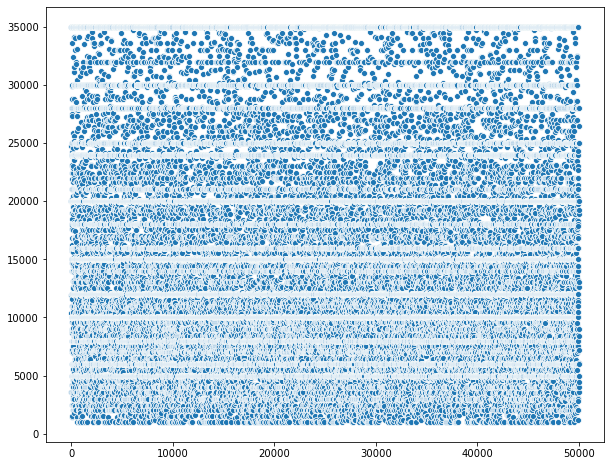

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df['loan_amnt'])

#### Loan_amount is not Linearly Distributed

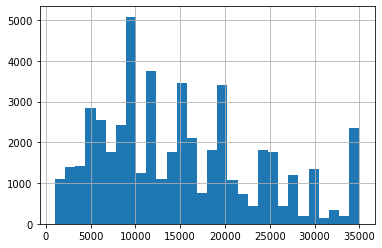

In [23]:
df['loan_amnt'].hist(bins=30)

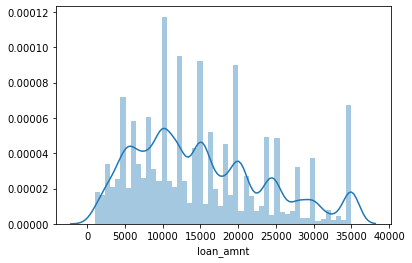

In [24]:
sns.distplot(df['loan_amnt'])           

#### from this plot it is clear that 'loan_amnt' is not normally distributed it is sort of right skewed

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe56c500be0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe56c50d2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe56c500880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe56c50d9a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe56c50dca0>],
 'means': []}

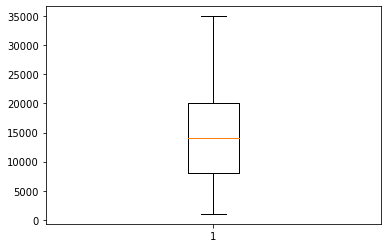

In [25]:
plt.boxplot(x=df['loan_amnt'])

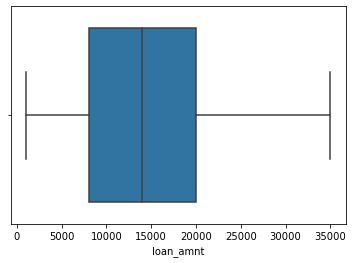

In [26]:
sns.boxplot(x=df['loan_amnt'])     

#### From the box plot we can see there is no outliers in 'loan amnt'

In [27]:
df['loan_amnt'].isnull().sum()     #There is no null value in loan_amnt column

0

In [28]:
df.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,9027.0,15610.654149,8596.029703,1000.0,9312.50,14825.0,20800.00,35000.0
Current,5610.0,20165.392157,7233.787883,1200.0,14400.00,19500.0,25000.00,35000.0
Default,1.0,35000.000000,NaN,35000.0,35000.00,35000.0,35000.00,35000.0
Fully Paid,34978.0,13993.264338,8594.847774,1000.0,7200.00,12000.0,20000.00,35000.0
In Grace Period,100.0,20334.750000,7106.442602,8225.0,14493.75,20000.0,25031.25,35000.0
Late (16-30 days),38.0,18858.552632,7280.238145,10000.0,12750.00,17387.5,21000.00,35000.0
Late (31-120 days),246.0,19029.471545,8122.371495,2000.0,12000.00,18000.0,25000.00,35000.0


In [29]:
#those case where borrower take maximum amount(35K) of loan and do not pay back(charged off)
df[(df['loan_status']=='Charged Off') & (df['loan_amnt']==35000.0)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
63,68475450,NaN,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,C2,Lieutenant,7 years,MORTGAGE,106000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,351xx,AL,17.36,0.0,Apr-2002,730.0,734.0,0.0,NaN,NaN,8.0,0.0,39055.0,72.1,27.0,w,0.0,0.0,22968.61,22968.61,10323.88,7086.13,0.00,5558.60,1000.5480,Nov-2017,794.21,NaN,Mar-2019,504.0,500.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,299890.0,0.0,3.0,0.0,0.0,35.0,16012.0,43.0,0.0,0.0,9701.0,60.0,54200.0,0.0,4.0,0.0,0.0,37486.0,12875.0,67.2,0.0,0.0,135.0,164.0,38.0,35.0,4.0,38.0,NaN,NaN,NaN,0.0,3.0,4.0,3.0,6.0,13.0,4.0,10.0,4.0,8.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,366974.0,55067.0,39200.0,36981.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
144,68476522,NaN,35000.0,35000.0,35000.0,60 months,12.88,794.21,C,C2,Cosmetologist Manager,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,211xx,MD,13.39,0.0,Dec-1983,695.0,699.0,0.0,31.0,NaN,19.0,0.0,23315.0,47.2,32.0,w,0.0,0.0,25266.06,25266.06,6770.96,5092.10,0.00,13403.00,2412.5400,Apr-2017,794.21,NaN,Oct-2018,624.0,620.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1443.0,318752.0,1.0,1.0,0.0,0.0,63.0,5927.0,NaN,3.0,5.0,3690.0,47.0,49400.0,0.0,2.0,0.0,5.0,17708.0,13593.0,35.6,0.0,0.0,100.0,384.0,2.0,2.0,2.0,2.0,NaN,13.0,NaN,0.0,6.0,12.0,8.0,12.0,3.0,17.0,27.0,13.0,19.0,0.0,0.0,0.0,3.0,96.9,0.0

In [30]:
len(df[(df['loan_status']=='Charged Off') & (df['loan_amnt']==35000.0)])

429

#### here are 429 such casses are present where borrower take maximum amount(35K) of loan and do not pay back(charged off)

In [31]:
#those case where borrower take minimum amount(1K) of loan and do not pay back(charged off)
df[(df['loan_status']=='Charged Off') & (df['loan_amnt']==1000.0)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
748,68436190,NaN,1000.0,1000.0,1000.0,36 months,13.99,34.18,C,C4,Teacher's Assistant,10+ years,RENT,30000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,381xx,TN,31.08,0.0,Feb-1992,680.0,684.0,0.0,44.0,NaN,13.0,0.0,8676.0,57.1,33.0,w,0.0,0.0,408.22,408.22,288.28,119.94,0.0,0.00,0.000,Jan-2017,34.18,NaN,Nov-2017,499.0,0.0,0.0,44.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,80157.0,1.0,4.0,2.0,2.0,11.0,71481.0,108.0,1.0,4.0,3161.0,92.0,15200.0,4.0,0.0,7.0,6.0,6680.0,1103.0,83.5,0.0,0.0,286.0,49.0,2.0,2.0,0.0,2.0,NaN,7.0,NaN,1.0,2.0,5.0,3.0,3.0,23.0,9.0,10.0,7.0,13.0,0.0,0.0,0.0,3.0,96.9,100.0,0.0,0.0,83949.0,80157.0,6700.0,68749.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4252,68383928,NaN,1000.0,1000.0,1000.0,36 months,9.17,31.88,B,B2,Labour,5 years,MORTGAGE,55000.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,197xx,DE,8.34,0.0,Apr-2010,670.0,674.0,0.0,NaN,NaN,7.0,0.0,2277.0,25.3,10.0,w,0.0,0.0,734.53,734.53,199.17,55.36,0.0,480.00,86.400,Sep-2016,31.88,NaN,Mar-2019,694.0,690.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,169.0,137644.0,0.0,2.0,0.0,2.0,13.0,7231.0,68.0,0.0,1.0,1173.0,48.0,9000.0,1.0,1.0,0.0,4.0,19663.0,5623.0,28.8,0.0,0.0,35.0,68.0,17.0,13.0,1.0,17.0,NaN,18.0,NaN,0.0,2.0,2.0,3.0,4.0,3.0,4.0,6.0,2.0,7.0,0.0,0.0,0.0,0.0,100.0,33.3,0.0,0.0,150805.0,9508.0,7900.0,10650.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [32]:
len(df[(df['loan_status']=='Charged Off') & (df['loan_amnt']==1000.0)])

21

#### here are 21 such casses are present where borrower take minimum amount(1k) of loan and do not pay back(charged off)

In [33]:
#those case where borrower take maximum amount(35K) of loan and pay back(fully paod)
(df[(df['loan_status']=='Fully Paid') & (df['loan_amnt']==35000.0)]).head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
57,68444620,NaN,35000.0,35000.0,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-1990,685.0,689.0,0.0,46.0,NaN,17.0,0.0,14277.0,27.4,46.0,w,0.0,0.0,44358.910698,44358.91,35000.0,9358.91,0.0,0.0,0.0,Dec-2018,17952.27,NaN,Mar-2019,724.0,720.0,0.0,56.0,1.0,Individual,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.0,0.0,1.0,5020.0,40.0,52200.0,1.0,4.0,0.0,3.0,8639.0,17248.0,35.6,0.0,0.0,206.0,310.0,19.0,3.0,5.0,99.0,46.0,15.0,46.0,1.0,3.0,4.0,3.0,6.0,26.0,5.0,11.0,4.0,17.0,0.0,0.0,0.0,1.0,91.3,33.3,0.0,0.0,220950.0,49644.0,26800.0,71700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
117,68566702,NaN,35000.0,35000.0,35000.0,60 months,20.50,937.06,E,E4,"Director, Human Resources",8 years,MORTGAGE,120000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,301xx,GA,35.69,1.0,Oct-1994,700.0,704.0,0.0,3.0,NaN,25.0,0.0,13993.0,32.2,54.0,w,0.0,0.0,39312.220000,39312.22,35000.0,4312.22,0.0,0.0,0.0,Aug-2016,33789.51,NaN,May-2018,749.0,745.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,440222.0,2.0,9.0,2.0,5.0,3.0,223030.0,106.0,0.0,2.0,5063.0,82.0,43400.0,2.0,0.0,3.0,7.0,20010.0,11939.0,33.7,0.0,0.0,254.0,115.0,17.0,3.0,3.0,17.0,NaN,6.0,NaN,0.0,2.0,4.0,5.0,9.0,28.0,13.0,22.0,5.0,25.0,0.0,0.0,0.

In [34]:
len((df[(df['loan_status']=='Fully Paid') & (df['loan_amnt']==35000.0)]))

1373

#### here are 1373 such casses are present where borrower take maximum amount(35K) of loan and pay back(fully paid)

In [35]:
#those case where borrower take minimum amount(1K) of loan and pay back(fully paid)
df[(df['loan_status']=='Fully Paid') & (df['loan_amnt']==1000.0)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
555,68356556,NaN,1000.0,1000.0,1000.0,36 months,11.48,32.97,B,B5,Production Control,10+ years,RENT,86000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,875xx,NM,20.64,0.0,Aug-2000,660.0,664.0,0.0,NaN,NaN,10.0,0.0,26498.0,80.3,22.0,w,0.0,0.0,1130.360326,1130.36,1000.0,130.36,0.0,0.0,0.0,Jun-2017,604.43,NaN,Aug-2018,709.0,705.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,38815.0,0.0,2.0,0.0,0.0,28.0,12317.0,47.0,1.0,3.0,7124.0,65.0,33000.0,0.0,0.0,0.0,3.0,4313.0,166.0,99.3,0.0,0.0,184.0,119.0,8.0,8.0,0.0,8.0,NaN,NaN,NaN,0.0,5.0,6.0,5.0,8.0,11.0,8.0,11.0,6.0,10.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,59352.0,38815.0,25100.0,26352.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
736,67347650,NaN,1000.0,1000.0,1000.0,36 months,11.99,33.21,C,C1,data entry operator,10+ years,MORTGAGE,36522.0,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Other,139xx,NY,35.72,0.0,Nov-1989,660.0,664.0,0.0,NaN,NaN,23.0,0.0,12138.0,78.0,28.0,w,0.0,0.0,1126.722200,1126.72,1000.0,126.72,0.0,0.0,0.0,Apr-2017,663.45,NaN,Mar-2019,699.0,695.0,0.0,49.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,68819.0,2.0,19.0,2.0,2.0,6.0,56681.0,99.0,1.0,3.0,3503.0,78.0,15650.0,0.0,0.0,3.0,5.0,2992.0,2875.0,92.0,0.0,0.0,87.0,313.0,1.0,1.0,0.0,16.0,NaN,4.0,NaN,0.0,2.0,4.0,2.0,3.0,22.0,4.0,6.0,4.0,23.0,NaN,0.0,0.0,3.0,96.0,100.0,0.0,0.0,72766.0,68819.0,5750.0,57116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [36]:
len(df[(df['loan_status']=='Fully Paid') & (df['loan_amnt']==1000.0)])

217

#### here are 217 such casses are present where borrower take minimum amount(1k) of loan and pay back(fully paid)

In [37]:
#Total Fully paid & Charged Off loan amount
df.groupby(['loan_status'])['loan_amnt'].sum().sort_values(ascending = False).reset_index().head(2)

,loan_status,loan_amnt
0,Fully Paid,489456400.0
1,Charged Off,140917375.0


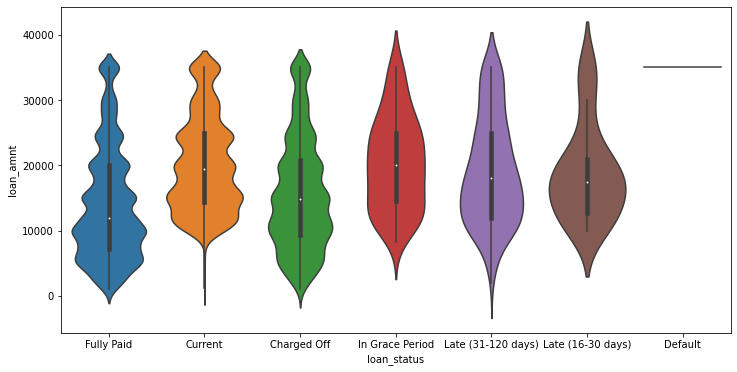

In [38]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df, x='loan_status', y='loan_amnt')

#### From the violin plot we can visualize 50% data points are more spread on both section

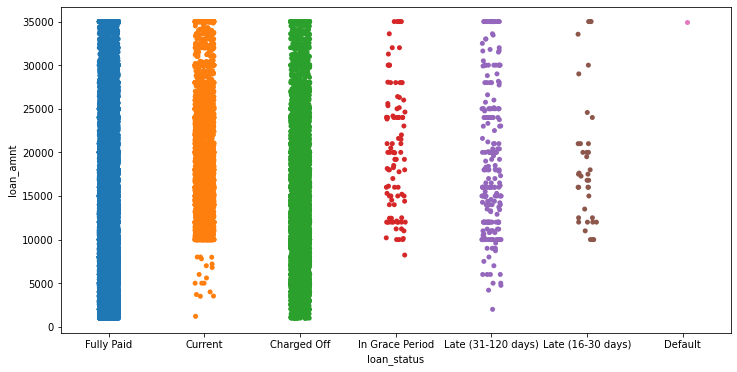

In [40]:
plt.figure(figsize=(12,6))
sns.stripplot(x=df['loan_status'],y=df['loan_amnt'])

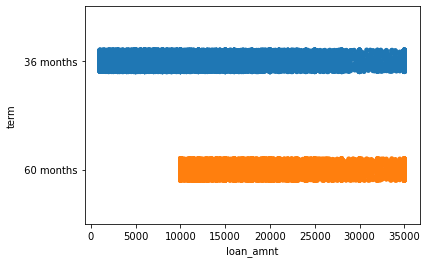

In [41]:
sns.stripplot(x=df['loan_amnt'],y=df['term'])

#### for term 60 months loan amount starts from 10000

Text(0, 0.5, 'loan_amount')

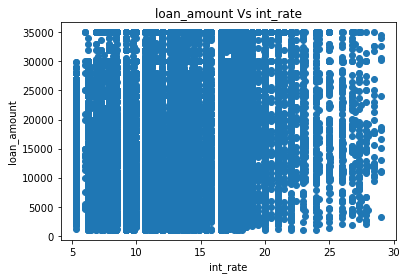

In [42]:
plt.scatter(x='int_rate',y='loan_amnt',data=df)
plt.title('loan_amount Vs int_rate')
plt.xlabel('int_rate')
plt.ylabel('loan_amount')

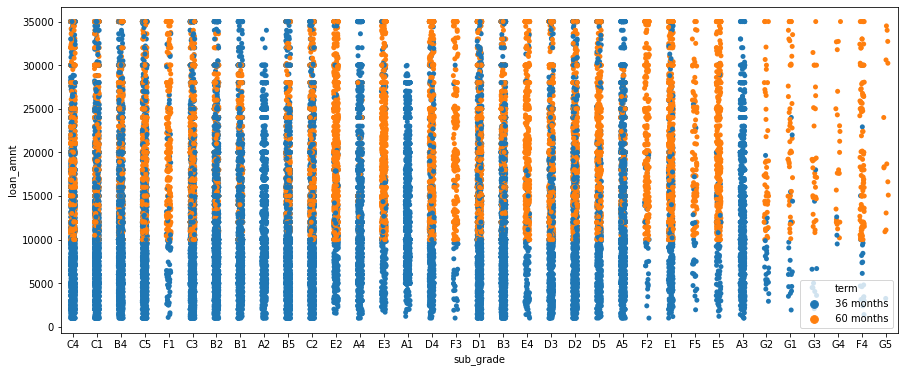

In [43]:
plt.figure(figsize=(15,6))
sns.stripplot(x=df['sub_grade'],y=df['loan_amnt'],hue=df['term'])

#### for sub grade G5,G4,G3,G2,G1 and F1,F2,F3,F4,F5 Long Term loans are more and for sub grade A1,A2,A3,A4,A5 And B1,B2,B3,B4,B5 short terms loans are more

#### There is no long term loan for low loan amount

## 4. term

In [71]:
df['term'].isnull().sum()

0

#### No null values are present in term columns

In [72]:
df['term'].describe()

count          50000
unique             2
top        36 months
freq           34177
Name: term, dtype: object

In [73]:
df['term'].value_counts()

 36 months    34177
 60 months    15823
Name: term, dtype: int64

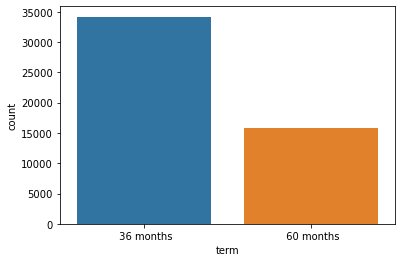

In [74]:
sns.countplot(df['term'])

#### For term 36 months More than double loan are approved than term 60 months

In [75]:
(df['term'].value_counts()/df.shape[0])*100

 36 months    68.354
 60 months    31.646
Name: term, dtype: float64

In [76]:
((df['term'].value_counts()/df.shape[0])*100).cumsum()

 36 months     68.354
 60 months    100.000
Name: term, dtype: float64

In [77]:
df.groupby([df['term']])['loan_status'].value_counts(normalize=True)

term        loan_status       
 36 months  Fully Paid            0.844193
            Charged Off           0.152851
            Late (31-120 days)    0.001404
            Current               0.001346
            In Grace Period       0.000205
 60 months  Fully Paid            0.387158
            Current               0.351640
            Charged Off           0.240346
            Late (31-120 days)    0.012513
            In Grace Period       0.005878
            Late (16-30 days)     0.002402
            Default               0.000063
Name: loan_status, dtype: float64

#### Charged off casses are more for term 60 months & Fully paid casses are more for term 36 months

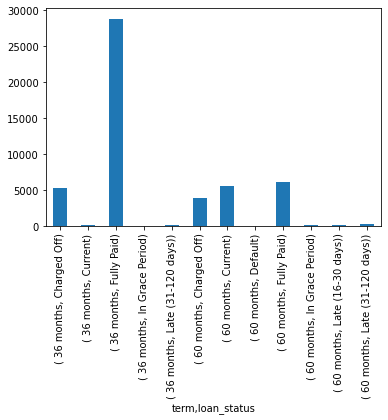

In [78]:
#charged off and fully paid casses are high for term 36 months
df.groupby([df['term'],df['loan_status']])['loan_status'].count().plot(kind='bar')

## 5. int_rate

In [79]:
df['int_rate'].isnull().sum()

0

In [80]:
df['int_rate'].describe()

count    50000.000000
mean        12.234782
std          4.191338
min          5.320000
25%          9.170000
50%         11.990000
75%         14.480000
max         28.990000
Name: int_rate, dtype: float64

1.For which casses int_rate high(28.990000) ?

2.How many such casses are present ?

3. For which casses int_rate is low(5.320000) ?

4.2.How many such casses are present ?

In [81]:
len(df[(df['int_rate']==28.990000)])

15

In [82]:
df[(df['int_rate'] ==28.990000)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
2668,68384913,NaN,18225.0,18225.0,18225.0,60 months,28.99,578.39,G,G5,IT Manager,3 years,RENT,50000.0,Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,276xx,NC,20.91,0.0,Aug-2007,670.0,674.0,2.0,44.0,NaN,13.0,0.0,29197.0,88.5,42.0,f,0.00,0.00,4068.350000,4068.35,880.30,2545.08,0.0,642.97,115.7346,Jul-2016,578.39,NaN,Oct-2017,609.0,605.0,0.0,54.0,1.0,Individual,NaN,NaN,NaN,0.0,435.0,57845.0,0.0,9.0,0.0,0.0,28.0,28648.0,83.0,1.0,2.0,9566.0,86.0,33000.0,2.0,9.0,4.0,2.0,4450.0,1503.0,86.9,0.0,0.0,91.0,100.0,10.0,10.0,0.0,21.0,54.0,3.0,44.0,1.0,2.0,3.0,2.0,4.0,25.0,4.0,16.0,3.0,13.0,0.0,0.0,0.0,1.0,92.7,50.0,0.0,0.0,67335.0,57845.0,11500.0,34335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2746,68394899,NaN,30225.0,30225.0,30225.0,60 months,28.99,959.22,G,G5,Distribution manager,10+ years,RENT,83400.0,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,114xx,NY,21.56,0.0,Jan-2005,695.0,699.0,1.0,57.0,64.0,8.0,1.0,13186.0,49.0,15.0,w,0.00,0.00,43255.796512,43255.80,30225.00,13030.80,0.0,0.00,0.0000,Sep-2017,442.97,NaN,Mar-2019,669.0,665.0,0.0,57.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,47028.0,0.0,3.0,2.0,3.0,9.0,28357.0,78.0,3.0,3.0,4604.0,67.0,26900.0,0.0,0.0,4.0,6.0,5879.0,4404.0,72.5,0.0,0.0,125.0,131.0,9.0,9.0,1.0,9.0,77.0,4.0,77.0,1.0,3.0,3.0,3.0,5.0,6.0,4.0,7.0,4.0,8.0,0.0,0.0,0.0,5.0,92.9,66.7,0.0,1.0,70128.0,47028.0,16000.0,36

In [83]:
len(df[(df['int_rate']==5.320000)])

1970

In [84]:
df[(df['int_rate']==5.320000)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
26,68596180,NaN,20000.0,20000.0,20000.0,36 months,5.32,602.30,A,A1,driver,9 years,OWN,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,125xx,NY,18.83,0.0,May-1991,835.0,839.0,1.0,NaN,NaN,12.0,0.0,2269.0,3.0,17.0,w,0.0,0.0,21631.724329,21631.72,20000.0,1631.72,0.00,0.0,0.0,Aug-2018,3577.50,NaN,Aug-2018,809.0,805.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,15444.0,0.0,2.0,0.0,1.0,15.0,13175.0,44.0,0.0,1.0,1448.0,15.0,76200.0,2.0,0.0,1.0,2.0,1287.0,73931.0,3.0,0.0,0.0,63.0,295.0,19.0,15.0,0.0,19.0,NaN,4.0,NaN,0.0,3.0,3.0,10.0,11.0,4.0,10.0,13.0,3.0,12.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,106217.0,15444.0,76200.0,30017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
28,68607141,NaN,17600.0,17600.0,17600.0,36 months,5.32,530.03,A,A1,Network Security Specialist III,< 1 year,MORTGAGE,88000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,672xx,KS,26.59,0.0,May-2001,780.0,784.0,0.0,NaN,NaN,20.0,0.0,12203.0,34.4,42.0,w,0.0,0.0,18305.080000,18305.08,17600.0,705.08,0.00,0.0,0.0,Nov-2016,17.88,NaN,Aug-2018,779.0,775.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,229082.0,0.0,10.0,1.0,4.0,9.0,68644.0,74.0,0.0,0.0,9347.0,63.0,35500.0,2.0,6.0,1.0,5.0,12057.0,11397.0,51.7,0.0,0.0,160.0,175.0,37.0,9.0,5.0,37.0,NaN,10.0,NaN,0.0,2.0,2.0,4.0,7.0,24.0,8.0,13.0,2.0,20.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,285027.0,80847

In [85]:
df['int_rate'].value_counts()

9.17     2908
11.99    2846
13.67    2667
13.18    2584
12.59    2564
         ... 
25.09      14
26.06      13
26.99      10
27.49       7
27.99       5
Name: int_rate, Length: 70, dtype: int64

In [86]:
np.sort(df['int_rate'].unique())

array([ 5.32,  6.  ,  6.24,  6.49,  6.89,  6.99,  7.26,  7.49,  7.89,
        7.91,  8.18,  8.38,  8.49,  9.17,  9.76,  9.8 ,  9.99, 10.64,
       10.78, 10.99, 11.22, 11.48, 11.49, 11.99, 12.05, 12.59, 12.88,
       13.18, 13.44, 13.67, 13.99, 14.33, 14.48, 14.85, 15.41, 15.77,
       16.55, 16.59, 16.99, 17.27, 17.57, 17.86, 17.97, 18.2 , 18.49,
       18.99, 19.48, 19.89, 19.99, 20.5 , 20.99, 21.48, 21.99, 22.45,
       22.99, 23.13, 23.99, 24.24, 24.99, 25.09, 25.99, 26.06, 26.77,
       26.99, 27.31, 27.49, 27.88, 27.99, 28.49, 28.99])

In [87]:
df[(df['int_rate']==28.99 )]['grade'].unique()

array(['G'], dtype=object)

In [88]:
df[(df['int_rate']==28.49 )]['grade'].unique()

array(['G'], dtype=object)

In [89]:
df[(df['int_rate']==27.99 )]['grade'].unique()

array(['G'], dtype=object)

In [90]:
df[(df['int_rate']==27.88 )]['grade'].unique()

array(['G'], dtype=object)

In [91]:
df[(df['int_rate']==27.49 )]['grade'].unique()

array(['G'], dtype=object)

In [92]:
df[(df['int_rate']==27.31)]['grade'].unique()

array(['G'], dtype=object)

In [93]:
df[(df['int_rate']==26.99 )]['grade'].unique()

array(['G'], dtype=object)

In [94]:
df[(df['int_rate']==26.77)]['grade'].unique() 

array(['G'], dtype=object)

#### from this data we can clearly say that int_rate depends on grade, High int_rate belongs to 'G' grade

In [95]:
df[(df['int_rate']==26.06)]['grade'].unique()

array(['F'], dtype=object)

In [96]:
df[(df['int_rate']==25.09)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1249,68546600,NaN,10000.0,10000.0,10000.0,36 months,25.09,398.08,F,F4,Medical Social Worker,4 years,RENT,110000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,medical,Medical expenses,912xx,CA,11.83,1.0,Dec-2008,660.0,664.0,5.0,16.0,74.0,20.0,1.0,9415.0,41.3,22.0,w,0.00,0.00,12894.639874,12894.64,10000.00,2894.64,0.00,0.00,0.0000,May-2017,6958.29,NaN,Mar-2019,634.0,630.0,0.0,16.0,1.0,Individual,NaN,NaN,NaN,0.0,640.0,28194.0,10.0,2.0,2.0,2.0,1.0,18779.0,86.0,10.0,17.0,1634.0,63.0,22800.0,1.0,0.0,6.0,19.0,1410.0,8200.0,47.8,0.0,0.0,8.0,84.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,1.0,9.0,16.0,9.0,9.0,2.0,18.0,19.0,17.0,20.0,0.0,0.0,1.0,12.0,95.5,22.2,1.0,0.0,44638.0,28194.0,15700.0,21838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1702,68576057,NaN,15025.0,15025.0,15025.0,36 months,25.09,598.11,F,F4,Office Manager,4 years,RENT,47000.0,Verified,Dec-2015,Late (31-120 days),n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,395xx,MS,11.54,0.0,Nov-2009,675.0,679.0,0.0,47.0,NaN,3.0,0.0,171.0,6.3,10.0,f,29.78,29.78,21509.510000,21509.51,14995.22,6484.38,29.91,0.00,0.0000,Jan-2019,598.11,Apr-2019,Mar-2019,549.0,545.0,0.0,47.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,3766.0,1.0,1.0,0.0,2.0,18.0,3595.0,45.0,2.0,2.0,96.0,35.0,2700.0,0.0,0.0,4.0,5.0,1255.0,2529.0,6.3,0.0,0.0,69.0,9.0,6.0,6.0,0.0,6.0,NaN,2.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0,87.5,0.0,0.0,0.0,10691.0,3766.0,2700.0,7991.

In [97]:
df['int_rate'].nunique()

70

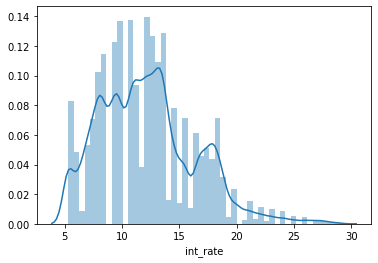

In [98]:
sns.distplot(df['int_rate'])           #this features kind of right skewed

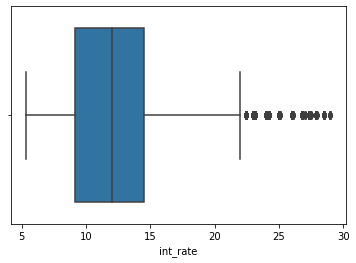

In [99]:
sns.boxplot(df['int_rate'])

#### outliers record

In [100]:
len(df[(df['int_rate']>=21.99)])

1210

In [101]:
df[(df['int_rate']>=21.99)].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,Jul-2016,10128.96,NaN,Mar-2018,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,12.0,1.0,12.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
31,68341789,NaN,24250.0,24250.0,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,75000.0,Not Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,NaN,114xx,NY,20.84,0.0,Apr-2007,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,w,0.0,0.0,4124.420000,4124.42,1332.69,2791.73,0.0,0.00,0.0000,Jul-2016,701.01,NaN,Mar-2018,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,320098.0,2.0,1.0,0.0,1.0,14.0,13676.0,75.0,2.0,10.0,3138.0,61.0,38000.0,1.0,1.0,3.0,13.0,17783.0,9044.0,68.9,0.0,0.0,93.0,104.0,2.0,2.0,2.0,2.0,NaN,7.0,NaN,0.0,10.0,12.0,11.0,12.0,2.0,15.0,16.0,12.0,18.0,0.0,0.0,0.0,3.0,100.0,63.6,0.0,0.0,344960.0,38475.0,2

In [102]:
df[(df['int_rate']>=21.99)]['grade'].unique()

array(['F', 'G'], dtype=object)

In [103]:
df.groupby(['loan_status'])['int_rate'].max()

loan_status
Charged Off           28.99
Current               28.99
Default               20.99
Fully Paid            28.99
In Grace Period       28.49
Late (16-30 days)     21.99
Late (31-120 days)    26.99
Name: int_rate, dtype: float64

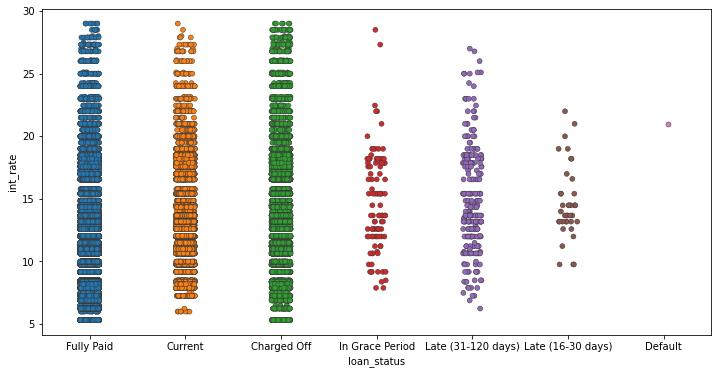

In [104]:
plt.figure(figsize=(12,6))
sns.stripplot(x=df['loan_status'],y=df['int_rate'],linewidth=0.5)

#### Again that means higher int_rate belongs to "F" and "G" Grade

## 6. installment

In [105]:
df['installment'].isnull().sum()

0

In [106]:
df['installment'].describe()

count    50000.000000
mean       434.098806
std        247.494017
min         14.770000
25%        255.040000
50%        378.150000
75%        573.702500
max       1354.660000
Name: installment, dtype: float64

In [107]:
df['installment'].value_counts()

318.79    260
301.15    195
315.12    191
325.69    182
332.10    176
         ... 
298.95      1
187.78      1
408.59      1
606.57      1
688.89      1
Name: installment, Length: 11548, dtype: int64

In [108]:
df['installment'].unique()

array([123.03, 820.28, 432.66, ..., 237.33, 410.84, 157.66])

In [109]:
#who paid highest installment
df[(df['installment']==1354.660000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
7010,68252128,NaN,35000.0,35000.0,34950.0,36 months,22.99,1354.66,F,F2,Administrator,10+ years,MORTGAGE,100000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,934xx,CA,20.24,2.0,Apr-1999,700.0,704.0,0.0,6.0,8.0,14.0,1.0,57111.0,12.7,23.0,w,0.0,0.0,48710.092301,48640.51,35000.0,13710.09,0.0,0.0,0.0,Jan-2019,54.09,NaN,Jan-2019,689.0,685.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,107232.0,1.0,4.0,2.0,3.0,5.0,50121.0,73.0,2.0,5.0,1256.0,64.0,81800.0,2.0,2.0,5.0,8.0,8249.0,3244.0,27.9,0.0,0.0,124.0,200.0,11.0,5.0,2.0,11.0,NaN,5.0,6.0,0.0,1.0,4.0,1.0,4.0,6.0,10.0,15.0,4.0,14.0,0.0,0.0,0.0,4.0,83.3,0.0,0.0,1.0,150161.0,107232.0,4500.0,68361.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#who paid lowest installment
df[(df['installment']==14.770000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
45162,65756334,NaN,6000.0,6000.0,6000.0,36 months,6.89,14.77,A,A3,Case Reviewer,10+ years,RENT,75000.0,Source Verified,Nov-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,295xx,SC,13.3,0.0,Nov-2003,690.0,694.0,0.0,43.0,NaN,5.0,0.0,9016.0,79.1,12.0,w,0.0,0.0,6593.841329,6593.84,6000.0,593.84,0.0,0.0,0.0,Jul-2018,73.23,NaN,Mar-2019,674.0,670.0,0.0,43.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,23478.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11400.0,NaN,NaN,NaN,1.0,4696.0,995.0,63.1,0.0,0.0,144.0,124.0,69.0,13.0,0.0,69.0,NaN,17.0,NaN,2.0,2.0,3.0,2.0,4.0,4.0,3.0,6.0,3.0,5.0,0.0,0.0,0.0,0.0,81.8,0.0,0.0,0.0,43715.0,23478.0,2700.0,32315.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


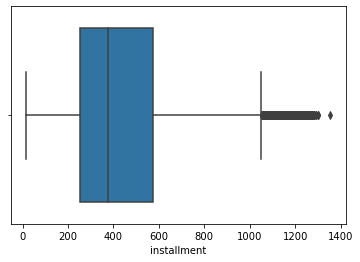

In [111]:
sns.boxplot(df['installment'])

#### From the box plot we can see that outliers are rangeing b\w Approx 1050 to 1400

In [112]:
#there is no installment like 1050
df[(df['installment']==1050)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term


#### for checking exact vale of installment which is greater than or equal to 1050 we did following steps

In [113]:
#first we check 

In [114]:
c=np.sort(df['installment'].unique())

In [115]:
i=pd.DataFrame(c)

In [116]:
#pd.set_option('display.max_rows',11548)

In [117]:
i.shape

(11548, 1)

In [118]:
#i.head(11548)

In [119]:
len(df[(df['installment']>=1050.98)])

1342

In [120]:
df[(df['installment']>=1050.98)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
74,68394562,NaN,30000.0,30000.0,30000.0,36 months,15.77,1051.31,D,D1,Vice-President,2 years,MORTGAGE,175000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,430xx,OH,18.50,0.0,Aug-1997,725.0,729.0,1.0,61.0,NaN,9.0,0.0,21831.0,50.3,23.0,w,0.0,0.0,33903.765739,33903.77,30000.0,3903.77,0.00,0.0,0.0,Dec-2016,23456.38,NaN,Sep-2017,734.0,730.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,408118.0,2.0,4.0,2.0,4.0,6.0,130740.0,84.0,0.0,1.0,12141.0,71.0,43400.0,4.0,3.0,3.0,7.0,51015.0,21569.0,50.3,0.0,0.0,118.0,220.0,16.0,6.0,3.0,16.0,NaN,0.0,61.0,0.0,2.0,2.0,3.0,7.0,9.0,4.0,11.0,2.0,9.0,0.0,0.0,0.0,3.0,95.7,33.3,0.0,0.0,447599.0,152571.0,43400.0,146568.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
103,66583801,NaN,33600.0,33600.0,33600.0,36 months,10.78,1096.53,B,B4,Aviation Safety Inspector,8 years,RENT,104000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,441xx,OH,14.01,0.0,Nov-2000,690.0,694.0,2.0,29.0,NaN,14.0,0.0,28475.0,51.8,31.0,w,0.0,0.0,34309.150000,34309.15,33600.0,709.15,0.00,0.0,0.0,Mar-2016,33262.93,NaN,Mar-2016,699.0,695.0,0.0,29.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,42952.0,0.0,1.0,0.0,0.0,50.0,14477.0,NaN,1.0,1.0,12992.0,52.0,55000.0,1.0,0.0,5.0,1.0,3068.0,8302.0,75.0,0.0,0.0,156.0,181.0,8.0,8.0,1.0,8.0,NaN,1.0,NaN,1.0,5.0,9.0,6.0,12.0,7.0,13.0,23.0,10.0,14.0,0.0,0.0,0.0,1.0,96.8,33.3,0.0,0.0,

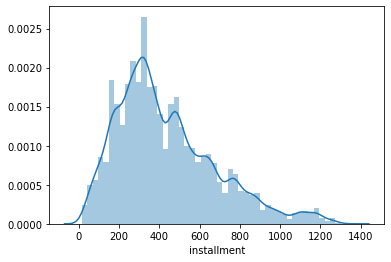

In [121]:
sns.distplot(df['installment'])

Text(0, 0.5, 'loan_amount')

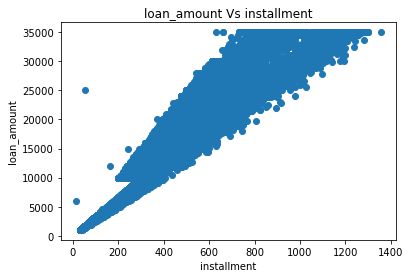

In [122]:
plt.scatter(x='installment',y='loan_amnt',data=df)
plt.title('loan_amount Vs installment')
plt.xlabel('installment')
plt.ylabel('loan_amount')

#### Here is linear relationship b/w installment and loan amount if loan amount is high then installment will be more

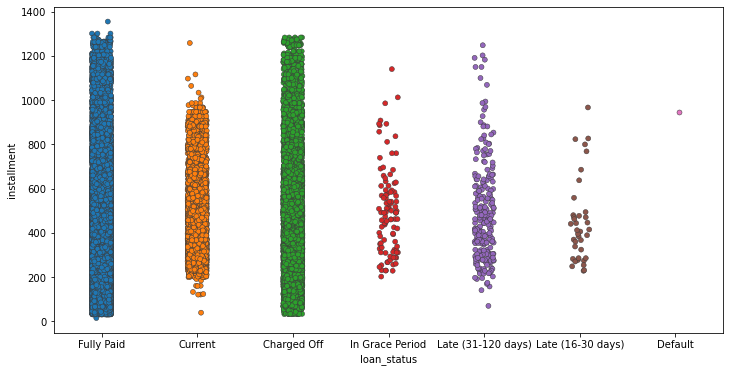

In [123]:
plt.figure(figsize=(12,6))
sns.stripplot(x=df['loan_status'],y=df['installment'],linewidth=0.5)

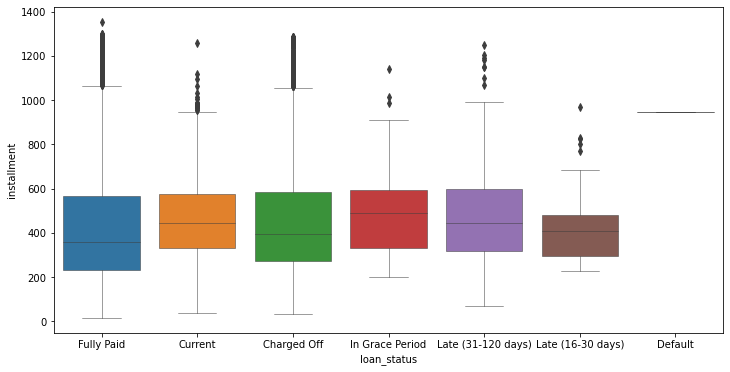

In [124]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['loan_status'],y=df['installment'],linewidth=0.5)

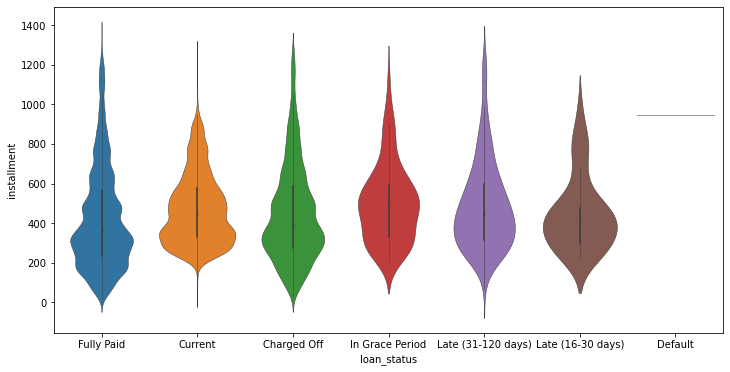

In [125]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df['loan_status'],y=df['installment'],linewidth=0.5)

## 7.grade

In [126]:
df['grade'].isnull().sum()

0

In [127]:
df['grade'].describe()

count     50000
unique        7
top           B
freq      15264
Name: grade, dtype: object

In [128]:
df['grade'].unique()

array(['C', 'B', 'F', 'A', 'E', 'D', 'G'], dtype=object)

In [129]:
df['grade'].value_counts()

B    15264
C    14516
A     8641
D     6872
E     3496
F      989
G      222
Name: grade, dtype: int64

In [130]:
(df['grade'].value_counts()/df.shape[0])*100

B    30.528
C    29.032
A    17.282
D    13.744
E     6.992
F     1.978
G     0.444
Name: grade, dtype: float64

In [131]:
((df['grade'].value_counts()/df.shape[0])*100).cumsum()

B     30.528
C     59.560
A     76.842
D     90.586
E     97.578
F     99.556
G    100.000
Name: grade, dtype: float64

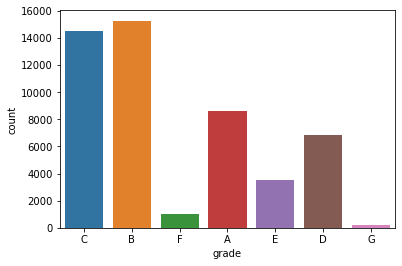

In [132]:
sns.countplot(df['grade'])

In [134]:
df.groupby(['grade','loan_status'])['loan_status'].count()

grade  loan_status       
A      Charged Off             444
       Current                 217
       Fully Paid             7969
       In Grace Period           2
       Late (31-120 days)        9
B      Charged Off            1916
       Current                1307
       Fully Paid            11975
       In Grace Period          18
       Late (16-30 days)         4
       Late (31-120 days)       44
C      Charged Off            2873
       Current                2150
       Fully Paid             9352
       In Grace Period          31
       Late (16-30 days)        22
       Late (31-120 days)       88
D      Charged Off            2002
       Current                1111
       Fully Paid             3680
       In Grace Period          27
       Late (16-30 days)         5
       Late (31-120 days)       47
E      Charged Off            1246
       Current                 660
       Default                   1
       Fully Paid             1527
       In Grace Period       

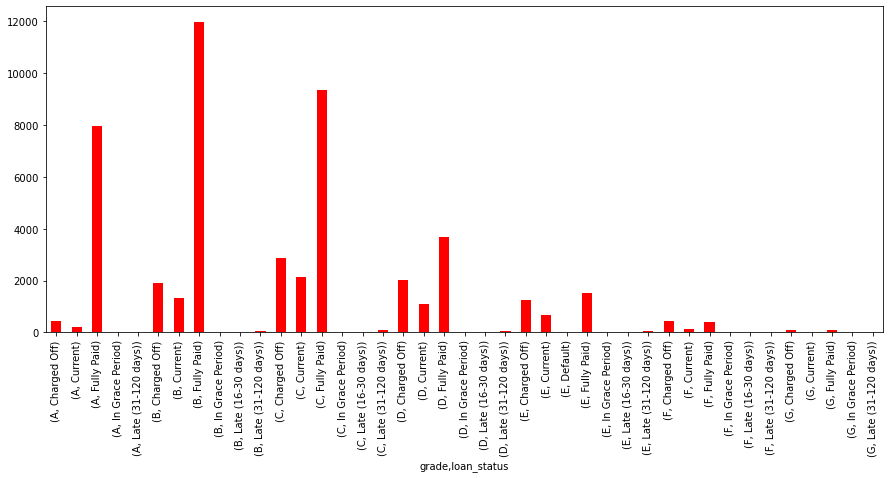

In [135]:
plt.figure(figsize=(15,6))
df.groupby(['grade','loan_status'])['loan_status'].count().plot.bar(color='red')

In [136]:
df.groupby(['loan_status'])['grade'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,9027,7,C,2873
Current,5610,7,C,2150
Default,1,1,E,1
Fully Paid,34978,7,B,11975
In Grace Period,100,7,C,31
Late (16-30 days),38,5,C,22
Late (31-120 days),246,7,C,88


## 8.sub_grade

In [137]:
df['sub_grade'].isnull().sum()

0

In [138]:
df['sub_grade'].describe()

count     50000
unique       35
top          C1
freq       3309
Name: sub_grade, dtype: object

In [139]:
df['sub_grade'].unique()

array(['C4', 'C1', 'B4', 'C5', 'F1', 'C3', 'B2', 'B1', 'A2', 'B5', 'C2',
       'E2', 'A4', 'E3', 'A1', 'D4', 'F3', 'D1', 'B3', 'E4', 'D3', 'D2',
       'D5', 'A5', 'F2', 'E1', 'F5', 'E5', 'A3', 'G2', 'G1', 'G3', 'G4',
       'F4', 'G5'], dtype=object)

In [140]:
df['sub_grade'].value_counts()

C1    3309
B4    3260
B3    3241
B5    3134
C4    3054
C2    2997
C3    2966
B2    2910
B1    2719
A5    2420
C5    2190
A1    1970
D1    1956
A4    1671
D2    1457
A2    1328
D3    1255
A3    1252
D4    1198
D5    1006
E1     922
E2     866
E3     733
E4     524
E5     451
F1     318
F2     236
F3     201
F4     121
F5     113
G2      70
G1      68
G3      42
G4      27
G5      15
Name: sub_grade, dtype: int64

In [141]:
df[(df['sub_grade'] == 'C1')]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
17,68577849,NaN,18000.0,18000.0,18000.0,60 months,11.99,400.31,C,C1,GS-11,10+ years,MORTGAGE,112000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,856xx,AZ,8.68,0.0,Nov-1993,800.0,804.0,0.0,NaN,NaN,17.0,0.0,10711.0,15.5,27.0,w,0.00,0.00,18387.220000,18387.22,18000.00,387.22,0.0,0.00,0.0000,Mar-2016,18004.90,NaN,Mar-2019,794.0,790.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,205067.0,3.0,1.0,2.0,2.0,3.0,25416.0,97.0,2.0,3.0,7672.0,38.0,82400.0,0.0,1.0,1.0,5.0,17089.0,60336.0,16.7,0.0,0.0,109.0,265.0,1.0,1.0,4.0,1.0,NaN,10.0,NaN,0.0,5.0,6.0,12.0,12.0,6.0,15.0,17.0,6.0,16.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,309710.0,36127.0,69800.0,26210

In [142]:
(df['sub_grade'].value_counts()/df.shape[0])*100

C1    6.618
B4    6.520
B3    6.482
B5    6.268
C4    6.108
C2    5.994
C3    5.932
B2    5.820
B1    5.438
A5    4.840
C5    4.380
A1    3.940
D1    3.912
A4    3.342
D2    2.914
A2    2.656
D3    2.510
A3    2.504
D4    2.396
D5    2.012
E1    1.844
E2    1.732
E3    1.466
E4    1.048
E5    0.902
F1    0.636
F2    0.472
F3    0.402
F4    0.242
F5    0.226
G2    0.140
G1    0.136
G3    0.084
G4    0.054
G5    0.030
Name: sub_grade, dtype: float64

In [143]:
((df['sub_grade'].value_counts()/df.shape[0])*100).cumsum()

C1      6.618
B4     13.138
B3     19.620
B5     25.888
C4     31.996
C2     37.990
C3     43.922
B2     49.742
B1     55.180
A5     60.020
C5     64.400
A1     68.340
D1     72.252
A4     75.594
D2     78.508
A2     81.164
D3     83.674
A3     86.178
D4     88.574
D5     90.586
E1     92.430
E2     94.162
E3     95.628
E4     96.676
E5     97.578
F1     98.214
F2     98.686
F3     99.088
F4     99.330
F5     99.556
G2     99.696
G1     99.832
G3     99.916
G4     99.970
G5    100.000
Name: sub_grade, dtype: float64

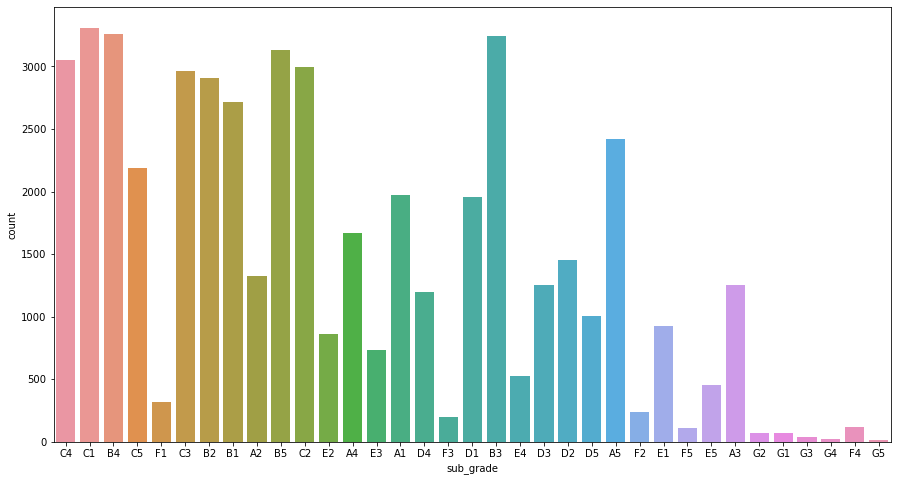

In [144]:
plt.figure(figsize=(15,8))
sns.countplot(df['sub_grade'])

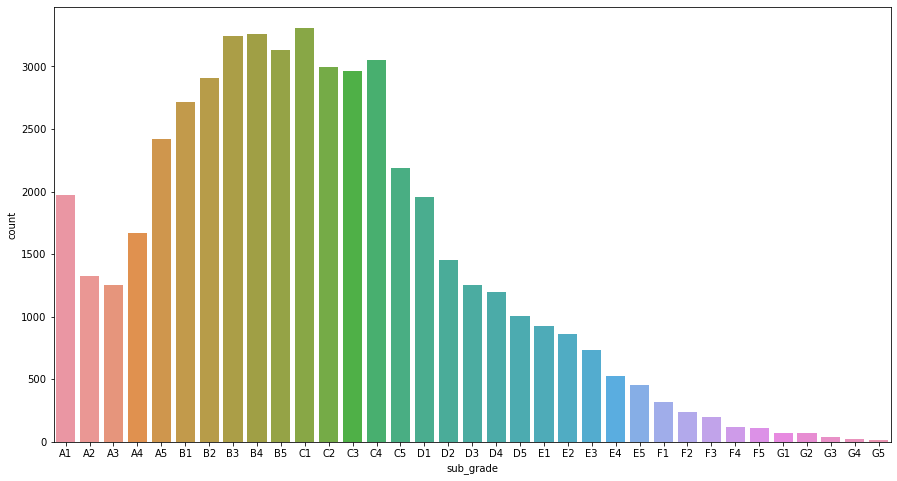

In [145]:
plt.figure(figsize=(15,8))
sns.countplot(df['sub_grade'].sort_values())

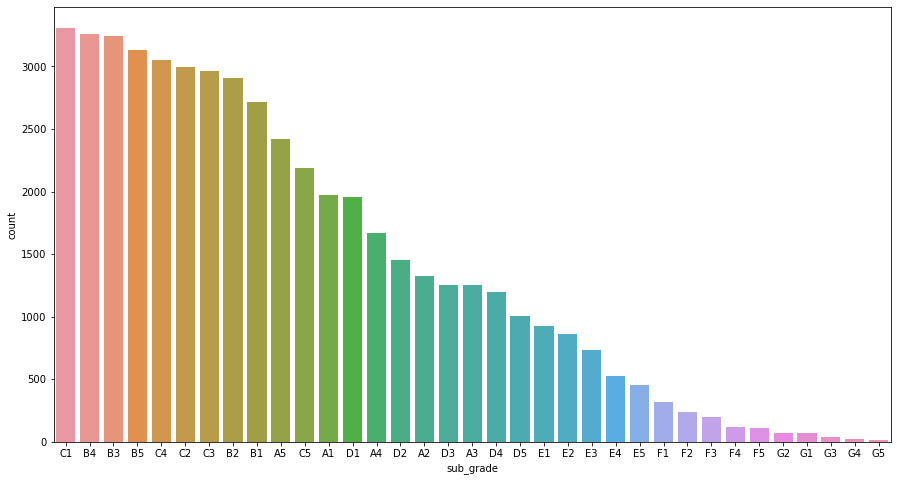

In [146]:
plt.figure(figsize=(15,8))
sns.countplot(x='sub_grade', data=df, order=df['sub_grade'].value_counts().index)

In [147]:
#percentage of loan status from different sub group 
df.groupby(['sub_grade'])['loan_status'].value_counts(normalize=True).head(60)

sub_grade  loan_status       
A1         Fully Paid            0.972589
           Charged Off           0.027411
A2         Fully Paid            0.959337
           Charged Off           0.039157
           Current               0.000753
           Late (31-120 days)    0.000753
A3         Fully Paid            0.948882
           Charged Off           0.050319
           Late (31-120 days)    0.000799
A4         Fully Paid            0.903651
           Charged Off           0.067026
           Current               0.027528
           Late (31-120 days)    0.001795
A5         Fully Paid            0.859917
           Current               0.070248
           Charged Off           0.067355
           Late (31-120 days)    0.001653
           In Grace Period       0.000826
B1         Fully Paid            0.825671
           Charged Off           0.086061
           Current               0.085325
           Late (31-120 days)    0.002207
           In Grace Period       0.000736
B2  

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df['loan_status'],y=df['sub_grade'],linewidth=0.5)

## 9.emp_title

In [149]:
df['emp_title'].isnull().sum()

2995

In [150]:
df['emp_title'].isnull().mean()   #here almost 6% data are missing

0.0599

In [151]:
# or we can see % of data missing another way  (df['emp_title'].isnull().sum()/df.shape[0])*100

In [152]:
df['emp_title'].describe()

count       47005
unique      21288
top       Teacher
freq          994
Name: emp_title, dtype: object

In [153]:
df['emp_title'].nunique()

21288

In [154]:
df['emp_title'].value_counts().head(20)

Teacher             994
Manager             832
Owner               560
Registered Nurse    386
Supervisor          377
RN                  376
Driver              315
Sales               313
Project Manager     289
owner               251
Director            246
General Manager     214
President           208
Engineer            192
manager             192
Office Manager      191
teacher             183
Vice President      174
driver              163
Attorney            153
Name: emp_title, dtype: int64

In [155]:
(df['emp_title'].value_counts()/df.shape[0])*100

Teacher                 1.988
Manager                 1.664
Owner                   1.120
Registered Nurse        0.772
Supervisor              0.754
                        ...  
BROKER ASSISTANT        0.002
Case Reviewer           0.002
Analytics Consultant    0.002
Teachers Assistant      0.002
CNc machinist           0.002
Name: emp_title, Length: 21288, dtype: float64

In [156]:
((df['emp_title'].value_counts()/df.shape[0])*100).cumsum()

Teacher                  1.988
Manager                  3.652
Owner                    4.772
Registered Nurse         5.544
Supervisor               6.298
                         ...  
BROKER ASSISTANT        94.002
Case Reviewer           94.004
Analytics Consultant    94.006
Teachers Assistant      94.008
CNc machinist           94.010
Name: emp_title, Length: 21288, dtype: float64

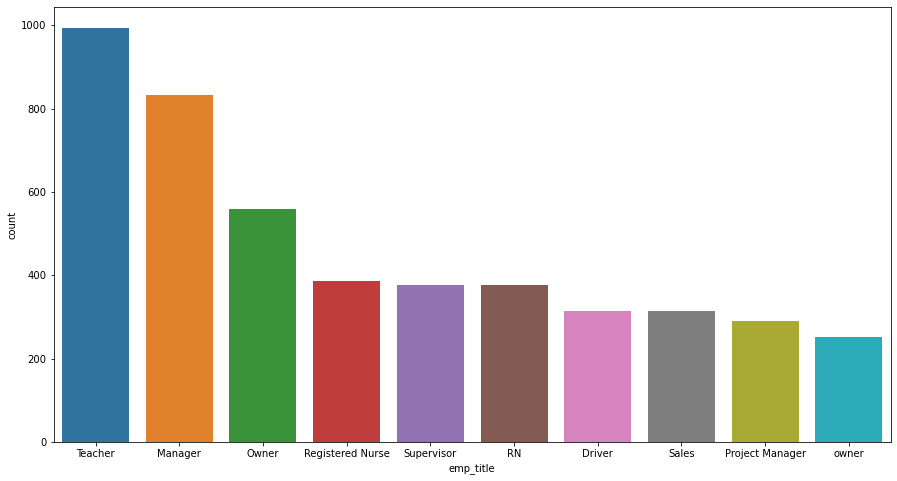

In [157]:
plt.figure(figsize=(15,8))
sns.countplot(x='emp_title',data=df,order=df['emp_title'].value_counts()[0:10].index)

In [158]:
df.groupby(['loan_status','emp_title'])['emp_title'].count()

loan_status         emp_title                  
Charged Off          Case Managerr                 1
                     Home Manger                   1
                     Housekeeping                  1
                     Operations                    1
                    12W                            1
                                                  ..
Late (31-120 days)  serverassistant                1
                    speech language pathologist    1
                    supervisor                     1
                    truck driver                   1
                    valve tester                   1
Name: emp_title, Length: 24591, dtype: int64

## 10.emp_length

In [159]:
df['emp_length'].isnull().sum()

2989

In [160]:
#percentage missing value
(df['emp_length'].isnull().sum()/df.shape[0])*100

5.978

In [161]:
df['emp_length'].describe()

count         47011
unique           11
top       10+ years
freq          16712
Name: emp_length, dtype: object

In [162]:
df['emp_length'].value_counts()

10+ years    16712
< 1 year      4511
2 years       4414
3 years       4032
1 year        3259
5 years       3042
4 years       2864
8 years       2513
6 years       1968
9 years       1906
7 years       1790
Name: emp_length, dtype: int64

In [163]:
(df['emp_length'].value_counts()/df.shape[0])*100

10+ years    33.424
< 1 year      9.022
2 years       8.828
3 years       8.064
1 year        6.518
5 years       6.084
4 years       5.728
8 years       5.026
6 years       3.936
9 years       3.812
7 years       3.580
Name: emp_length, dtype: float64

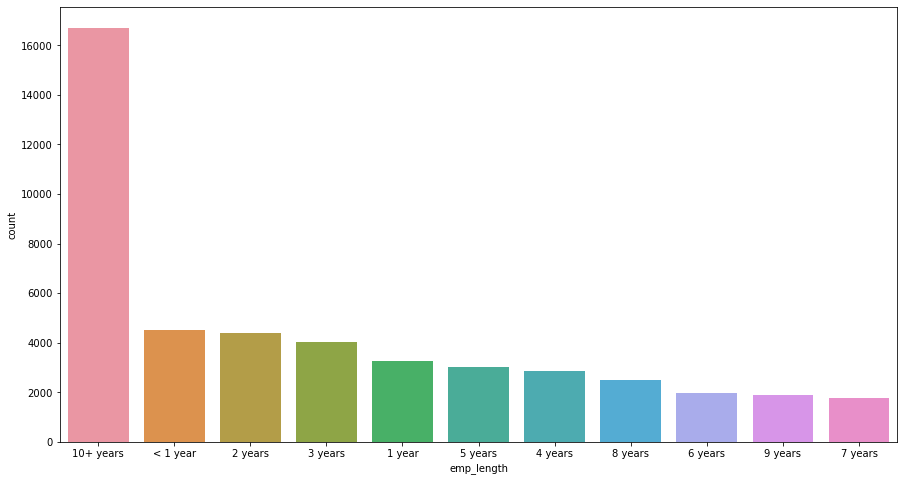

In [164]:
plt.figure(figsize=(15,8))
sns.countplot(x='emp_length',data=df,order=df['emp_length'].value_counts()[0:11].index)

In [165]:
df[(df['emp_length']=='10+ years')].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [166]:
df.groupby(['loan_status','emp_length'])['emp_length'].count()

loan_status         emp_length
Charged Off         1 year         617
                    10+ years     2801
                    2 years        781
                    3 years        757
                    4 years        545
                                  ... 
Late (31-120 days)  6 years         12
                    7 years          8
                    8 years         14
                    9 years          7
                    < 1 year        22
Name: emp_length, Length: 66, dtype: int64

## 11.home_ownership

In [167]:
df['home_ownership'].isnull().sum()

0

In [168]:
df['home_ownership'].describe()

count        50000
unique           4
top       MORTGAGE
freq         24586
Name: home_ownership, dtype: object

In [169]:
df['home_ownership'].value_counts()  

MORTGAGE    24586
RENT        19660
OWN          5753
ANY             1
Name: home_ownership, dtype: int64

In [170]:
(df['home_ownership'].value_counts()/df.shape[0])*100

MORTGAGE    49.172
RENT        39.320
OWN         11.506
ANY          0.002
Name: home_ownership, dtype: float64

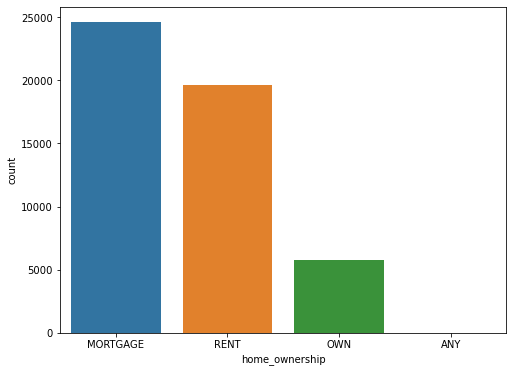

In [171]:
plt.figure(figsize=(8,6))
sns.countplot(x='home_ownership',data=df,order=df['home_ownership'].value_counts()[0:4].index)

In [172]:
df[(df['home_ownership']=='MORTGAGE')].head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [173]:
df.groupby(['loan_status','home_ownership'])['home_ownership'].count()

loan_status         home_ownership
Charged Off         MORTGAGE           3756
                    OWN                1082
                    RENT               4189
Current             MORTGAGE           3078
                    OWN                 605
                    RENT               1927
Default             OWN                   1
Fully Paid          ANY                   1
                    MORTGAGE          17569
                    OWN                4025
                    RENT              13383
In Grace Period     MORTGAGE             58
                    OWN                   6
                    RENT                 36
Late (16-30 days)   MORTGAGE             16
                    OWN                   6
                    RENT                 16
Late (31-120 days)  MORTGAGE            109
                    OWN                  28
                    RENT                109
Name: home_ownership, dtype: int64

In [ ]:
sns.scatterplot(x='home_ownership',y='loan_status',data=df)

## 12.annual_inc

In [175]:
df['annual_inc'].isnull().sum()

0

In [176]:
df['annual_inc'].describe()

count    5.000000e+04
mean     7.919317e+04
std      1.013212e+05
min      0.000000e+00
25%      4.800000e+04
50%      6.600000e+04
75%      9.500000e+04
max      9.000000e+06
Name: annual_inc, dtype: float64

In [177]:
#maximum annual income
df[(df['annual_inc']==9.000000e+06)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
40533,65945334,NaN,11000.0,11000.0,11000.0,36 months,6.89,339.1,A,A3,registered nurse,10+ years,MORTGAGE,9000000.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,330xx,FL,0.08,0.0,Apr-2004,705.0,709.0,1.0,43.0,NaN,15.0,0.0,14165.0,33.8,29.0,w,0.0,0.0,12206.413189,12206.41,11000.0,1206.41,0.0,0.0,0.0,Jan-2019,0.0,NaN,Mar-2019,719.0,715.0,0.0,43.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,324692.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41900.0,NaN,NaN,NaN,8.0,23192.0,22469.0,37.9,0.0,0.0,125.0,139.0,2.0,2.0,2.0,6.0,NaN,1.0,NaN,2.0,6.0,8.0,8.0,10.0,4.0,13.0,23.0,9.0,15.0,0.0,0.0,0.0,3.0,93.1,0.0,0.0,0.0,375537.0,15047.0,36200.0,15387.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
#minimum annual income
df[(df['annual_inc']==0.000000e+00)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
18202,66415476,NaN,20000.0,20000.0,20000.0,36 months,16.99,712.96,D,D3,NaN,NaN,MORTGAGE,0.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,760xx,TX,NaN,0.0,Jul-2001,685.0,689.0,1.0,NaN,NaN,7.0,0.0,7161.0,88.4,11.0,w,0.0,0.0,23891.003232,23891.0,20000.0,3891.0,0.0,0.0,0.0,Apr-2017,13183.66,NaN,Mar-2019,649.0,645.0,0.0,NaN,1.0,Joint App,185000.0,5.31,Not Verified,0.0,0.0,8715.0,1.0,1.0,0.0,1.0,14.0,1554.0,52.0,1.0,1.0,3527.0,79.0,8100.0,1.0,0.0,1.0,3.0,1245.0,178.0,97.5,0.0,0.0,40.0,173.0,4.0,4.0,1.0,112.0,NaN,0.0,NaN,0.0,4.0,5.0,4.0,5.0,3.0,6.0,7.0,5.0,7.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,0.0,11100.0,8715.0,7200.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
df['annual_inc'].value_counts()

60000.00     2024
50000.00     1751
65000.00     1546
70000.00     1514
75000.00     1390
             ... 
43466.00        1
136250.16       1
91250.00        1
16144.00        1
77764.00        1
Name: annual_inc, Length: 4480, dtype: int64

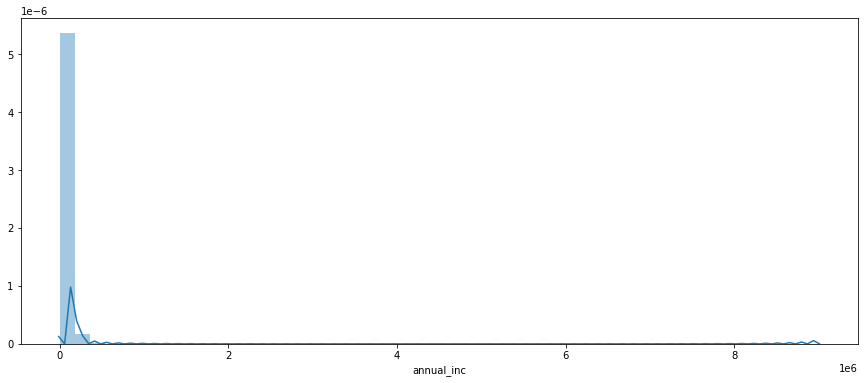

In [180]:
plt.figure(figsize=(15,6))
sns.distplot(df['annual_inc'])

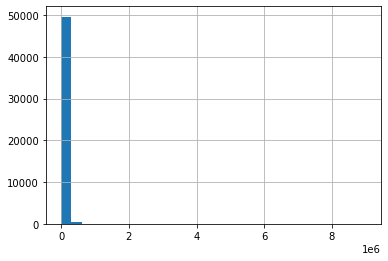

In [181]:
df['annual_inc'].hist(bins=30)

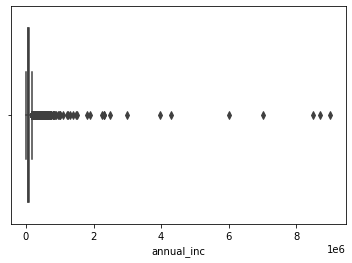

In [182]:
sns.boxplot(df['annual_inc'])

In [183]:
#most outliers values
df['annual_inc'].sort_values().tail(30).values

array([ 800000.,  828400.,  830000.,  850000.,  900000.,  953000.,
        975000., 1000000., 1000000., 1101000., 1200000., 1248000.,
       1300000., 1400000., 1473000., 1500000., 1800000., 1900021.,
       2250000., 2300000., 2300000., 2500000., 3000000., 3964280.,
       4300012., 6000000., 7000000., 8500021., 8700000., 9000000.])

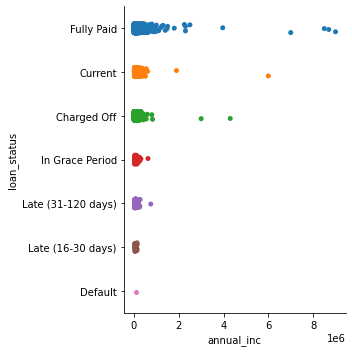

In [184]:
sns.catplot(x='annual_inc',y='loan_status',data=df)

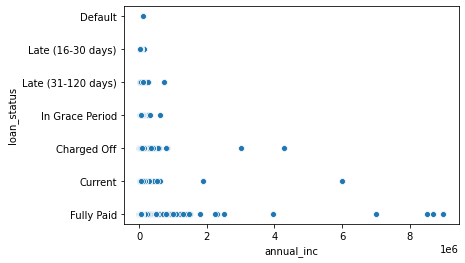

In [185]:
sns.scatterplot(x='annual_inc',y='loan_status',data=df)

## 13.verification_status

In [186]:
df['verification_status'].isnull().sum()

0

In [187]:
df['verification_status'].describe()

count               50000
unique                  3
top       Source Verified
freq                20677
Name: verification_status, dtype: object

In [188]:
df['verification_status'].value_counts()

Source Verified    20677
Verified           15705
Not Verified       13618
Name: verification_status, dtype: int64

In [189]:
(df['verification_status'].value_counts()/df.shape[0])*100

Source Verified    41.354
Verified           31.410
Not Verified       27.236
Name: verification_status, dtype: float64

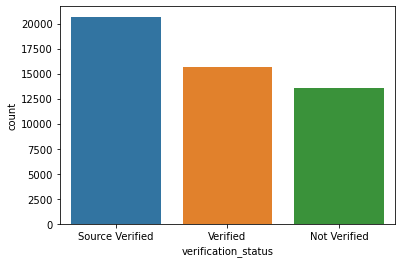

In [190]:
sns.countplot(x='verification_status',data=df,order=df['verification_status'].value_counts().index)

## 14.issue_d

In [191]:
df['issue_d'].isnull().sum()

0

In [192]:
df['issue_d'].describe()

count        50000
unique           2
top       Dec-2015
freq         43394
Name: issue_d, dtype: object

In [193]:
df['issue_d'].value_counts()

Dec-2015    43394
Nov-2015     6606
Name: issue_d, dtype: int64

In [194]:
(df['issue_d'].value_counts()/df.shape[0])*100

Dec-2015    86.788
Nov-2015    13.212
Name: issue_d, dtype: float64

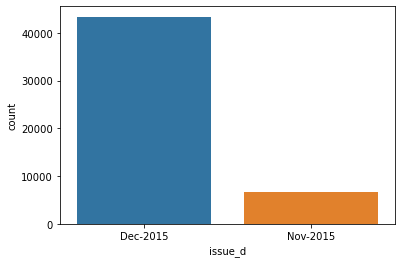

In [195]:
sns.countplot(x='issue_d',data=df,order=df['issue_d'].value_counts().index)

In [196]:
#pandas new function crosstab
pd.crosstab(df['issue_d'],df['loan_status'])

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
issue_d,,,,,,,
Dec-2015,7940,4875,1,30223,94,36,225
Nov-2015,1087,735,0,4755,6,2,21


## 15.loan_status

In [197]:
df['loan_status'].isnull().sum()

0

In [198]:
df['loan_status'].dtypes

dtype('O')

In [199]:
df['loan_status'].describe()

count          50000
unique             7
top       Fully Paid
freq           34978
Name: loan_status, dtype: object

In [200]:
df['loan_status'].value_counts()

Fully Paid            34978
Charged Off            9027
Current                5610
Late (31-120 days)      246
In Grace Period         100
Late (16-30 days)        38
Default                   1
Name: loan_status, dtype: int64

In [201]:
(df['loan_status'].value_counts()/df.shape[0])*100

Fully Paid            69.956
Charged Off           18.054
Current               11.220
Late (31-120 days)     0.492
In Grace Period        0.200
Late (16-30 days)      0.076
Default                0.002
Name: loan_status, dtype: float64

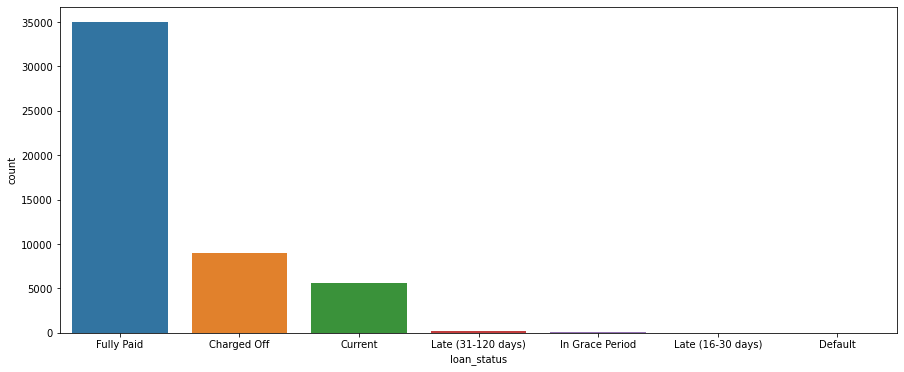

In [202]:
plt.figure(figsize=(15,6))
sns.countplot(x='loan_status',data=df,order=df['loan_status'].value_counts().index)

In [203]:
df['loan_status'].value_counts()[0:2]

Fully Paid     34978
Charged Off     9027
Name: loan_status, dtype: int64

In [204]:
#df['loan_status'].drop(df[df['loan_status']=='Current'].index,inplace=True)

In [205]:
df[(df['loan_status']== 'Charged Off')].tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
49985,65694085,NaN,6050.0,6050.0,6050.0,36 months,23.99,237.33,F,F3,Trainer PM Support Specialist,5 years,RENT,32000.0,Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,407xx,KY,25.62,0.0,Oct-2008,665.0,669.0,1.0,NaN,80.0,5.0,1.0,3085.0,50.6,16.0,f,0.0,0.0,4812.15,4812.15,2488.59,1797.56,15.0,511.0,91.980,Jun-2017,237.33,NaN,Dec-2017,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,31648.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6100.0,NaN,NaN,NaN,6.0,6330.0,220.0,78.0,0.0,0.0,85.0,57.0,1.0,1.0,0.0,4.0,NaN,4.0,NaN,0.0,1.0,4.0,1.0,1.0,12.0,4.0,4.0,4.0,5.0,0.0,0.0,0.0,3.0,100.0,100.0,1.0,0.0,39089.0,31648.0,1000.0,32989.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
49989,65344445,NaN,8400.0,8400.0,8400.0,36 months,6.89,258.95,A,A3,NaN,NaN,MORTGAGE,88600.0,Source Verified,Dec-2015,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,major_purchase,Major purchase,315xx,GA,2.60,0.0,Oct-1981,715.0,719.0,2.0,NaN,92.0,13.0,1.0,2349.0,7.5,14.0,w,0.0,0.0,6473.74,6473.74,5646.76,826.98,0.0,0.0,0.000,Jan-2018,258.95,NaN,Aug-2018,499.0,0.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,295.0,79528.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31500.0,NaN,NaN,NaN,7.0,6627.0,18540.0,10.0,0.0,0.0,NaN,409.0,3.0,3.0,1.0,4.0,NaN,3.0,NaN,0.0,4.0,8.0,7.0,7.0,0.0,12.0,13.0,8.0,13.0,0.0,0.0,0.0,4.0,100.0,0.0,1.0,0.0,115035.0,2349.0,20600.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 16.purpose

In [215]:
df['purpose'].isnull().sum()

0

In [216]:
df['purpose'].describe()

count                  50000
unique                    12
top       debt_consolidation
freq                   28283
Name: purpose, dtype: object

In [217]:
df['purpose'].value_counts()

debt_consolidation    28283
credit_card           12653
home_improvement       2977
other                  2759
major_purchase         1048
medical                 583
small_business          482
car                     452
moving                  280
vacation                275
house                   183
renewable_energy         25
Name: purpose, dtype: int64

In [218]:
(df['purpose'].value_counts()/df.shape[0])*100

debt_consolidation    56.566
credit_card           25.306
home_improvement       5.954
other                  5.518
major_purchase         2.096
medical                1.166
small_business         0.964
car                    0.904
moving                 0.560
vacation               0.550
house                  0.366
renewable_energy       0.050
Name: purpose, dtype: float64

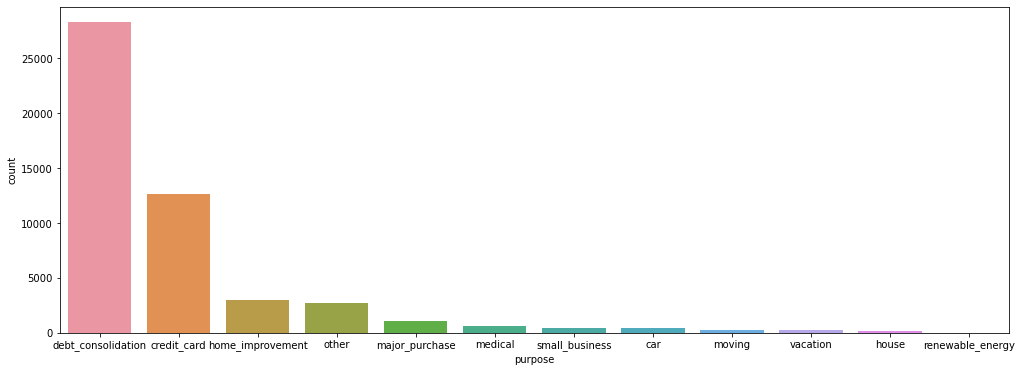

In [219]:
plt.figure(figsize=(17,6))
sns.countplot(x='purpose',data=df,order=df['purpose'].value_counts().index)

In [220]:
pd.crosstab(df['purpose'],df['loan_status'])

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
purpose,,,,,,,
car,62,48,0,338,2,0,2
credit_card,1870,1574,0,9118,28,10,53
debt_consolidation,5513,3341,1,19196,61,25,146
home_improvement,475,297,0,2182,6,1,16
house,46,13,0,123,0,0,1
major_purchase,194,77,0,766,1,1,9
medical,125,31,0,424,1,1,1
moving,63,14,0,202,0,0,1
other,492,175,0,2083,1,0,8


## 17.title

In [221]:
df['title'].isnull().sum()

132

In [222]:
df['title'].describe()

count                  49868
unique                    12
top       Debt consolidation
freq                   28224
Name: title, dtype: object

In [223]:
df['title'].value_counts()                     

Debt consolidation         28224
Credit card refinancing    12621
Home improvement            2957
Other                       2748
Major purchase              1045
Medical expenses             580
Business                     480
Car financing                450
Moving and relocation        279
Vacation                     276
Home buying                  183
Green loan                    25
Name: title, dtype: int64

In [224]:
(df['title'].value_counts()/df.shape[0])*100

Debt consolidation         56.448
Credit card refinancing    25.242
Home improvement            5.914
Other                       5.496
Major purchase              2.090
Medical expenses            1.160
Business                    0.960
Car financing               0.900
Moving and relocation       0.558
Vacation                    0.552
Home buying                 0.366
Green loan                  0.050
Name: title, dtype: float64

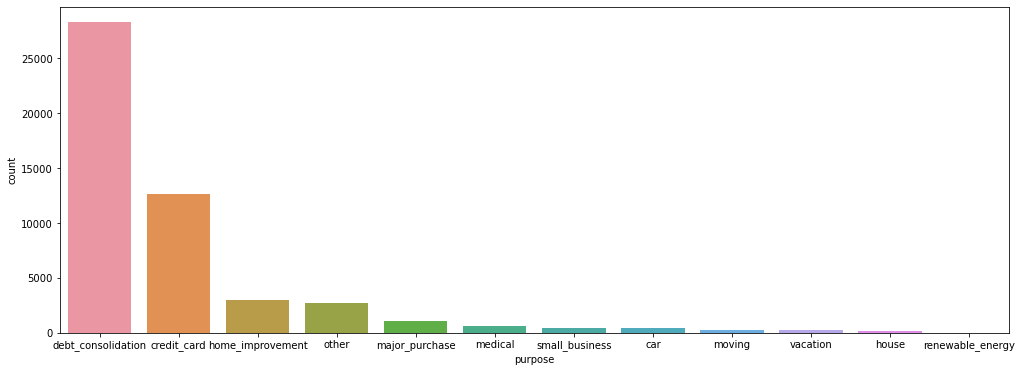

In [225]:
plt.figure(figsize=(17,6))
sns.countplot(x='purpose',data=df,order=df['purpose'].value_counts().index)

#### 'title' & 'purpose' these two features are almost same we can use one of those

## 18.zip_code

In [226]:
df['zip_code'].isnull().sum()

0

In [227]:
df['zip_code'].describe()

count     50000
unique      856
top       750xx
freq        563
Name: zip_code, dtype: object

In [228]:
df['zip_code'].value_counts()

750xx    563
945xx    516
300xx    502
112xx    500
606xx    468
        ... 
965xx      1
509xx      1
311xx      1
738xx      1
092xx      1
Name: zip_code, Length: 856, dtype: int64

In [229]:
df[(df['zip_code']=='750xx')] #these zip code represent Texas city

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
24,68476715,NaN,6000.0,6000.0,6000.0,36 months,7.49,186.61,A,A4,Analyst,10+ years,MORTGAGE,100000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,750xx,TX,13.28,1.0,May-1994,695.0,699.0,1.0,15.0,NaN,9.0,0.0,8563.0,72.0,16.0,w,0.0,0.0,6711.710107,6711.71,6000.0,711.71,0.0,0.0,0.0,Jan-2019,186.60,NaN,Mar-2019,719.0,715.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,116195.0,0.0,2.0,0.0,0.0,28.0,12525.0,35.0,0.0,1.0,2260.0,45.0,11900.0,0.0,1.0,1.0,1.0,12911.0,437.0,88.5,0.0,0.0,124.0,259.0,18.0,18.0,2.0,36.0,15.0,6.0,15.0,0.0,2.0,4.0,2.0,6.0,4.0,5.0,9.0,4.0,9.0,0.0,0.0,0.0,0.0,93.7,50.0,0.0,0.0,156354.0,22741.0,3800.0,36083.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
226,68426716,NaN,35000.0,35000.0,35000.0,60 months,18.49,898.13,D,D5,IT Supervisor,9 years,MORTGAGE,132500.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,750xx,TX,14.48,0.0,Jul-2003,670.0,674.0,1.0,57.0,NaN,16.0,0.0,27946.0,83.9,25.0,w,0.0,0.0,47716.459487,47716.46,35000.0,12716.46,0.0,0.0,0.0,May-2018,23556.83,NaN,May-2018,764.0,760.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,1053.0,359542.0,0.0,3.0,0.0,2.0,16.0,25495.0,63.0,0.0,1.0,10123.0,73.0,33300.0,2.0,4.0,4.0,3.0,22471.0,1899.0,90.9,0.0,0.0,72.0,149.0,13.0,13.0,5.0,56.0,NaN,0.0,NaN,0.0,5.0,9.0,5.0,6.0,6.0,11.0,14.0,10.0,16.0,0.0,0.0,0.0,0.0,92.0,100.0,0.0,0.0,416820.0,53441.0,209

In [230]:
df[(df['zip_code']=='750xx')]['addr_state'].value_counts()

TX    563
Name: addr_state, dtype: int64

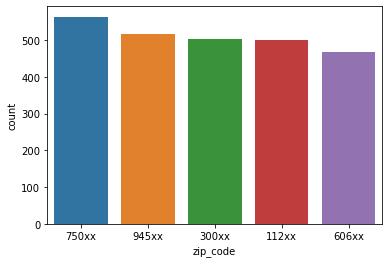

In [231]:
sns.countplot(x='zip_code',data=df,order=df['zip_code'].value_counts()[0:5].index)

## 19.addr_state

In [232]:
df['addr_state'].isnull().sum()

0

In [233]:
df['addr_state'].describe()

count     50000
unique       49
top          CA
freq       6706
Name: addr_state, dtype: object

In [234]:
df['addr_state'].value_counts()

CA    6706
TX    4217
NY    4083
FL    3550
IL    1894
NJ    1814
PA    1748
GA    1735
OH    1678
VA    1504
NC    1414
MI    1317
AZ    1226
MD    1217
MA    1151
CO    1014
WA     991
MN     900
TN     872
IN     840
MO     817
CT     759
NV     680
WI     654
SC     620
AL     597
LA     579
OR     557
KY     521
OK     449
KS     429
AR     377
UT     304
NM     278
MS     266
NH     244
NE     235
HI     235
ME     223
RI     218
WV     185
DE     144
MT     131
ND     127
DC     112
AK     102
VT     101
SD      95
WY      90
Name: addr_state, dtype: int64

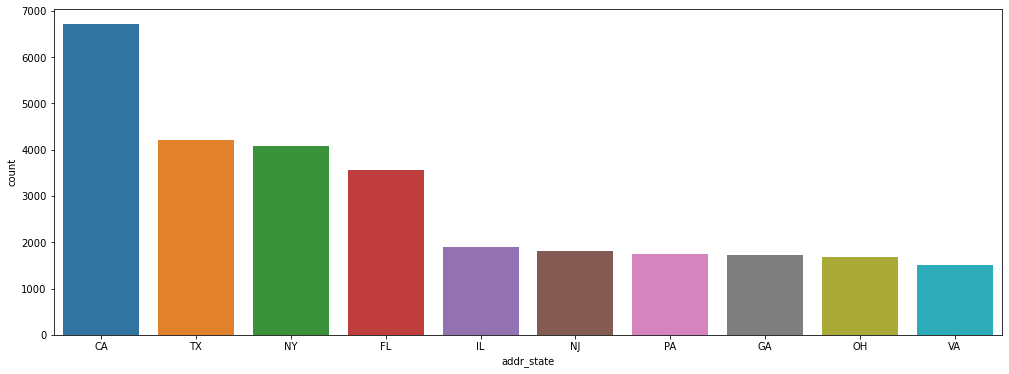

In [235]:
plt.figure(figsize=(17,6))
sns.countplot(x='addr_state',data=df,order=df['addr_state'].value_counts()[0:10].index)

#### Here is one disimilarity accroding to zip code this code(750xx) is High and it is belongs to adr_state "Tx", But accroding to adr_state adr_state 'CA' is high.

## 20.dti

In [236]:
df['dti'].isnull().sum()

1

In [237]:
df['dti'].describe()

count    49999.000000
mean        19.338815
std          9.810057
min          0.000000
25%         12.680000
50%         18.820000
75%         25.615000
max        999.000000
Name: dti, dtype: float64

In [238]:
df['dti'].nunique()

3984

In [239]:
df[(df['dti']==999.000000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
8721,67405134,NaN,6550.0,6550.0,6550.0,36 months,17.86,236.34,D,D5,NaN,NaN,MORTGAGE,1770.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,773xx,TX,999.0,2.0,Jul-1991,670.0,674.0,0.0,9.0,NaN,10.0,0.0,29029.0,84.4,25.0,w,0.0,0.0,8496.745074,8496.75,6550.0,1946.75,0.0,0.0,0.0,Jan-2019,4.76,NaN,Jan-2019,594.0,590.0,0.0,NaN,1.0,Joint App,62151.0,31.01,Not Verified,0.0,0.0,192764.0,1.0,1.0,1.0,1.0,6.0,20519.0,94.0,1.0,5.0,15885.0,88.0,34400.0,1.0,0.0,3.0,7.0,21418.0,115.0,99.5,0.0,0.0,161.0,293.0,10.0,6.0,2.0,15.0,9.0,1.0,9.0,0.0,3.0,6.0,3.0,9.0,3.0,8.0,20.0,7.0,10.0,0.0,0.0,0.0,2.0,80.0,100.0,0.0,0.0,202628.0,49548.0,24300.0,21909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
df['dti'].value_counts()

15.60    40
17.76    38
13.20    38
15.45    38
14.40    36
         ..
43.98     1
40.05     1
68.41     1
1.80      1
38.39     1
Name: dti, Length: 3984, dtype: int64

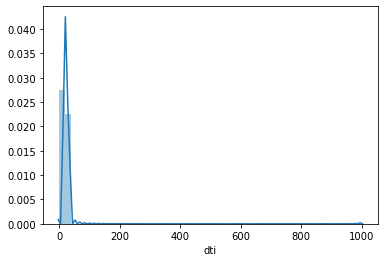

In [241]:
sns.distplot(df['dti'])

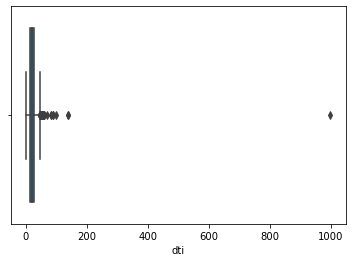

In [242]:
sns.boxplot(df['dti'])

In [243]:
np.sort(df['dti'].unique())

array([0.000e+00, 2.000e-02, 5.000e-02, ..., 1.374e+02, 9.990e+02,
             nan])

In [244]:
#outliers
df['dti'].sort_values(ascending=False).head(20)

8721     999.00
10548    137.40
13700    136.97
22841    100.09
27621     90.00
11879     89.83
4526      83.64
10023     83.40
24340     68.41
20867     59.26
19803     59.18
19523     58.54
32974     57.14
5234      55.06
16964     52.80
26167     52.45
2706      51.20
3773      48.56
17618     48.48
10459     47.31
Name: dti, dtype: float64

## 21.earliest_cr_line

In [250]:
df['earliest_cr_line'].isnull().sum()

0

In [251]:
df['earliest_cr_line'].describe()

count        50000
unique         605
top       Aug-2002
freq           387
Name: earliest_cr_line, dtype: object

In [252]:
df['earliest_cr_line'].value_counts().head(20)

Aug-2002    387
Sep-2003    374
Sep-2004    369
Sep-2002    362
Aug-2001    351
Aug-2004    347
Oct-2001    339
Aug-2003    334
Nov-1999    321
Sep-2001    319
Oct-2000    312
Oct-2002    311
Oct-2003    307
Oct-2004    306
Jul-2003    302
Nov-2000    297
Jul-2001    297
Aug-2000    292
Sep-2005    287
Mar-2003    287
Name: earliest_cr_line, dtype: int64

## 22.fico_range_low

In [253]:
df['fico_range_low'].isnull().sum()

0

In [254]:
df['fico_range_low'].describe()

count    50000.000000
mean       694.447900
std         30.895838
min        660.000000
25%        670.000000
50%        685.000000
75%        710.000000
max        845.000000
Name: fico_range_low, dtype: float64

In [255]:
df['fico_range_low'].nunique()

38

In [256]:
np.sort(df['fico_range_low'].unique())

array([660., 665., 670., 675., 680., 685., 690., 695., 700., 705., 710.,
       715., 720., 725., 730., 735., 740., 745., 750., 755., 760., 765.,
       770., 775., 780., 785., 790., 795., 800., 805., 810., 815., 820.,
       825., 830., 835., 840., 845.])

In [257]:
df['fico_range_low'].value_counts()

660.0    4942
665.0    4638
670.0    4498
675.0    4027
680.0    3866
685.0    3252
690.0    3235
695.0    2933
700.0    2759
705.0    2467
710.0    2174
715.0    1877
720.0    1529
725.0    1214
730.0    1063
735.0     752
740.0     719
745.0     558
750.0     519
755.0     495
760.0     369
765.0     333
770.0     294
775.0     263
780.0     219
785.0     188
790.0     164
795.0     140
800.0     120
805.0     111
810.0      99
815.0      59
820.0      51
825.0      25
830.0      19
835.0      15
845.0       8
840.0       6
Name: fico_range_low, dtype: int64

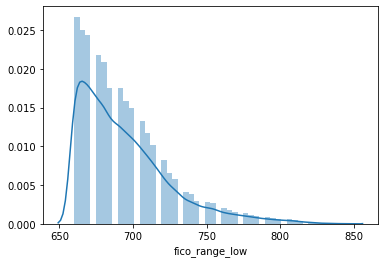

In [258]:
sns.distplot(df['fico_range_low'])

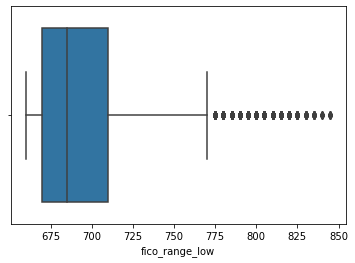

In [259]:
sns.boxplot(df['fico_range_low'])

## 23.fico_range_high

In [260]:
df['fico_range_high'].isnull().sum()

0

In [261]:
df['fico_range_high'].describe()

count    50000.00000
mean       698.44806
std         30.89662
min        664.00000
25%        674.00000
50%        689.00000
75%        714.00000
max        850.00000
Name: fico_range_high, dtype: float64

In [262]:
df['fico_range_high'].nunique()

38

In [263]:
np.sort(df['fico_range_high'].unique())

array([664., 669., 674., 679., 684., 689., 694., 699., 704., 709., 714.,
       719., 724., 729., 734., 739., 744., 749., 754., 759., 764., 769.,
       774., 779., 784., 789., 794., 799., 804., 809., 814., 819., 824.,
       829., 834., 839., 844., 850.])

In [264]:
df['fico_range_low'].value_counts()

660.0    4942
665.0    4638
670.0    4498
675.0    4027
680.0    3866
685.0    3252
690.0    3235
695.0    2933
700.0    2759
705.0    2467
710.0    2174
715.0    1877
720.0    1529
725.0    1214
730.0    1063
735.0     752
740.0     719
745.0     558
750.0     519
755.0     495
760.0     369
765.0     333
770.0     294
775.0     263
780.0     219
785.0     188
790.0     164
795.0     140
800.0     120
805.0     111
810.0      99
815.0      59
820.0      51
825.0      25
830.0      19
835.0      15
845.0       8
840.0       6
Name: fico_range_low, dtype: int64

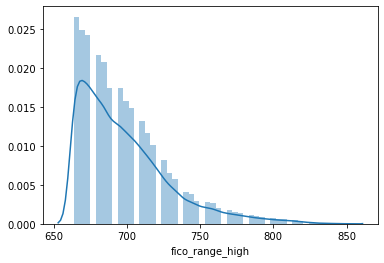

In [265]:
sns.distplot(df['fico_range_high'])

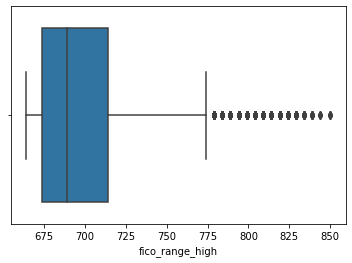

In [266]:
sns.boxplot(df['fico_range_high'])

In [267]:
df['fico_range_high'].corr(df['fico_range_low'])

0.9999999165254964

### fico_range_high and fico_range_low this two  features are aprox same with correlation 1

## 24.open_acc

In [284]:
df['open_acc'].isnull().sum()

0

In [285]:
df['open_acc'].describe()

count    50000.000000
mean        12.051420
std          5.709251
min          1.000000
25%          8.000000
50%         11.000000
75%         15.000000
max         67.000000
Name: open_acc, dtype: float64

In [286]:
df['open_acc'].unique()

array([ 7., 22.,  6., 13., 12.,  5.,  8., 14., 16., 17., 18.,  9., 21.,
       15., 11.,  3., 20., 33., 10., 24., 19., 27.,  4., 29., 30., 28.,
       25., 23., 26., 46., 34.,  2., 35., 32., 40., 55., 37., 31., 39.,
       47., 36., 38., 44.,  1., 42., 41., 43., 52., 45., 53., 65., 51.,
       58., 67., 49., 50.])

In [287]:
df['open_acc'].value_counts()

9.0     4343
10.0    4336
8.0     4035
11.0    3825
7.0     3507
12.0    3497
13.0    3194
6.0     2927
14.0    2701
15.0    2327
5.0     2083
16.0    1924
17.0    1789
18.0    1437
4.0     1244
19.0    1227
20.0     936
21.0     749
22.0     664
23.0     511
3.0      510
24.0     406
25.0     325
26.0     259
27.0     228
28.0     156
2.0      131
29.0     121
30.0     119
31.0      85
32.0      78
33.0      68
35.0      44
34.0      43
36.0      24
38.0      23
37.0      20
39.0      16
1.0       13
40.0      13
41.0      10
43.0      10
44.0       7
42.0       7
45.0       5
47.0       3
51.0       3
55.0       3
46.0       3
53.0       3
52.0       2
50.0       2
58.0       1
65.0       1
49.0       1
67.0       1
Name: open_acc, dtype: int64

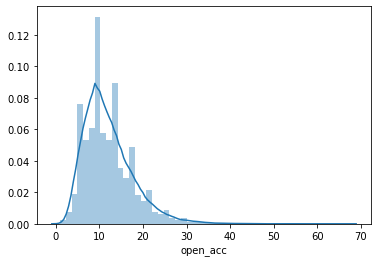

In [288]:
sns.distplot(df['open_acc'])

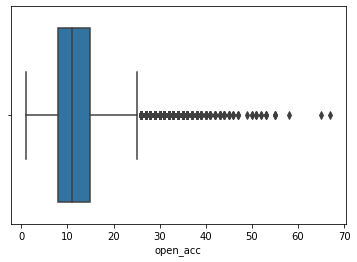

In [289]:
sns.boxplot(df['open_acc'])

## 25.pub_rec

In [290]:
df['pub_rec'].isnull().sum()

0

In [291]:
df['pub_rec'].describe()

count    50000.000000
mean         0.245820
std          0.668522
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: pub_rec, dtype: float64

In [292]:
df['pub_rec'].nunique()

18

In [293]:
df['pub_rec'].value_counts()

0.0     40815
1.0      7380
2.0      1179
3.0       356
4.0       129
5.0        59
6.0        33
8.0        15
7.0        12
10.0        6
9.0         5
12.0        3
15.0        2
11.0        2
13.0        1
23.0        1
17.0        1
26.0        1
Name: pub_rec, dtype: int64

In [294]:
df[(df['pub_rec']==26.0)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
38669,66036139,NaN,18000.0,18000.0,18000.0,60 months,13.67,415.76,C,C4,Teacher,10+ years,OWN,78000.0,Not Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,home_improvement,Home improvement,308xx,GA,26.15,0.0,Jan-1998,660.0,664.0,1.0,55.0,21.0,25.0,26.0,9447.0,25.3,50.0,w,7725.96,7725.96,16187.3,16187.3,10274.04,5913.26,0.0,0.0,0.0,Mar-2019,415.76,Apr-2019,Mar-2019,639.0,635.0,0.0,55.0,1.0,Individual,NaN,NaN,NaN,0.0,200.0,134296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37300.0,NaN,NaN,NaN,7.0,5372.0,9323.0,32.9,0.0,0.0,214.0,120.0,5.0,5.0,1.0,5.0,NaN,4.0,NaN,2.0,4.0,9.0,4.0,7.0,30.0,12.0,18.0,9.0,25.0,0.0,0.0,0.0,2.0,95.7,25.0,0.0,25.0,158902.0,134296.0,13900.0,121602.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 26.revol_bal

In [295]:
df['revol_bal'].isnull().sum()

0

In [296]:
df['revol_bal'].describe()

count     50000.000000
mean      17602.784540
std       23428.686322
min           0.000000
25%        6240.000000
50%       11828.000000
75%       21333.250000
max      898146.000000
Name: revol_bal, dtype: float64

In [297]:
df['revol_bal'].value_counts()

0.0        151
7412.0      10
5752.0       9
8021.0       9
10082.0      9
          ... 
23713.0      1
88172.0      1
16062.0      1
68852.0      1
13597.0      1
Name: revol_bal, Length: 27499, dtype: int64

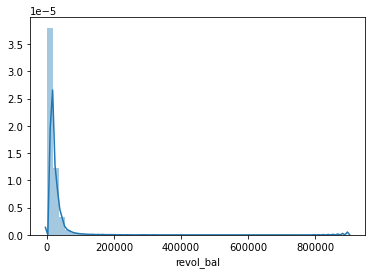

In [298]:
sns.distplot(df['revol_bal'])

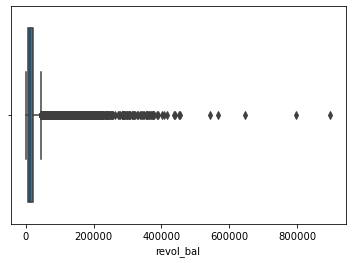

In [299]:
sns.boxplot(df['revol_bal'])

## 27.revol_util

In [300]:
df['revol_util'].isnull().sum()

24

In [301]:
df['revol_util'].describe()

count    49976.000000
mean        52.153029
std         24.168475
min          0.000000
25%         34.075000
50%         52.000000
75%         70.500000
max        145.800000
Name: revol_util, dtype: float64

In [302]:
df['revol_util'].nunique()

1083

In [303]:
df['revol_util'].value_counts()

0.0      163
48.0     135
52.0     131
61.0     126
49.0     119
        ... 
105.9      1
107.9      1
113.3      1
108.7      1
107.8      1
Name: revol_util, Length: 1083, dtype: int64

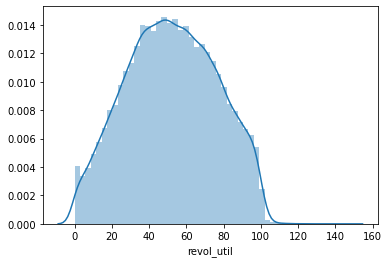

In [304]:
sns.distplot(df['revol_util'])

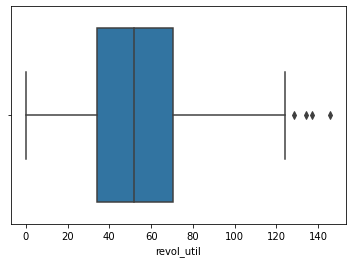

In [305]:
sns.boxplot(df['revol_util'])

In [306]:
df[(df['revol_util']==145.800000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
23158,66546586,NaN,8000.0,8000.0,8000.0,36 months,11.99,265.68,C,C1,SR SAP SECURITY CONSULTANT,4 years,MORTGAGE,105000.0,Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,car,Car financing,774xx,TX,8.58,0.0,Sep-2000,675.0,679.0,1.0,48.0,NaN,5.0,0.0,7000.0,145.8,19.0,w,0.0,0.0,8339.4,8339.4,8000.0,339.4,0.0,0.0,0.0,Apr-2016,7547.69,NaN,Jul-2018,564.0,560.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,385398.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4800.0,NaN,NaN,NaN,4.0,128466.0,0.0,145.8,0.0,0.0,41.0,183.0,7.0,7.0,1.0,11.0,NaN,2.0,48.0,0.0,1.0,1.0,3.0,8.0,5.0,3.0,13.0,1.0,5.0,0.0,0.0,0.0,2.0,94.7,100.0,0.0,0.0,398709.0,28310.0,4800.0,26000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


## 28.total_acc

In [308]:
df['total_acc'].isnull().sum()

0

In [309]:
df['total_acc'].describe()

count    50000.000000
mean        25.398280
std         12.112984
min          4.000000
25%         17.000000
50%         24.000000
75%         32.000000
max        127.000000
Name: total_acc, dtype: float64

In [310]:
df['total_acc'].unique()

array([ 13.,  38.,  18.,  17.,  35.,   6.,  27.,  15.,  23.,  29.,  24.,
         9.,  19.,  33.,  31.,  22.,   5.,  16.,  42.,  21.,  20.,  39.,
        72.,  46.,  34.,   7.,  12.,  63.,  28.,  26.,  44.,  43.,  37.,
        25.,  48.,  14.,  32.,  36.,  10.,  11.,  47.,  69.,  54.,  30.,
        62.,  64.,  49.,  68.,  52.,  45.,  40.,  56.,  53.,  41.,  87.,
        58.,  65.,   8.,  61.,   4.,  50.,  51.,  66.,  89.,  59.,  60.,
        70.,  71.,  55.,  57.,  75.,  77.,  67.,  76.,  73., 105.,  74.,
       102.,  85.,  98.,  81.,  78.,  83.,  79.,  84., 111.,  86.,  94.,
        97.,  90.,  82.,  93., 127.,  96., 101.,  91.,  80., 112., 125.,
       110.,  95.,  88.,  92., 109.])

In [311]:
df['total_acc'].value_counts()

20.0     1872
21.0     1827
24.0     1826
19.0     1793
23.0     1788
         ... 
96.0        1
125.0       1
111.0       1
97.0        1
109.0       1
Name: total_acc, Length: 104, dtype: int64

In [312]:
df[(df['total_acc']==127.000000)]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
30875,66065040,NaN,20000.0,20000.0,20000.0,60 months,11.22,437.05,B,B5,stockroom clerk,10+ years,OWN,70000.0,Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,credit_card,Credit card refinancing,217xx,MD,34.9,0.0,Jan-1985,705.0,709.0,3.0,46.0,NaN,51.0,0.0,19181.0,15.1,127.0,w,8297.86,8297.86,17020.02,17020.02,11702.14,5317.88,0.0,0.0,0.0,Mar-2019,437.05,Apr-2019,Mar-2019,624.0,620.0,0.0,54.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,205536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127200.0,NaN,NaN,NaN,24.0,4567.0,60708.0,2.9,0.0,0.0,147.0,370.0,0.0,0.0,4.0,2.0,51.0,0.0,46.0,3.0,6.0,10.0,18.0,43.0,4.0,49.0,118.0,10.0,51.0,0.0,0.0,0.0,14.0,93.7,5.6,0.0,0.0,327233.0,205536.0,62500.0,200000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


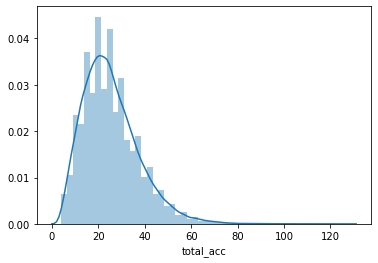

In [313]:
sns.distplot(df['total_acc'])

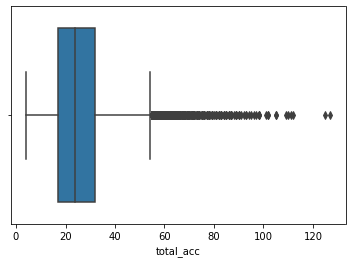

In [314]:
sns.boxplot(df['total_acc'])

## 29.initial_list_status

In [315]:
df['initial_list_status'].isnull().sum()

0

In [316]:
df['initial_list_status'].describe()

count     50000
unique        2
top           w
freq      40914
Name: initial_list_status, dtype: object

In [317]:
df['initial_list_status'].value_counts()

w    40914
f     9086
Name: initial_list_status, dtype: int64

In [318]:
(df['initial_list_status'].value_counts()/df.shape[0])*100

w    81.828
f    18.172
Name: initial_list_status, dtype: float64

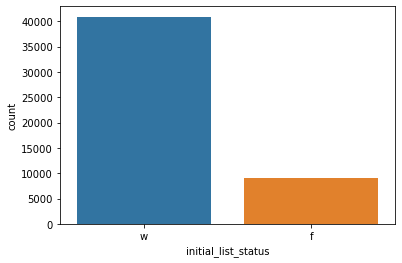

In [319]:
sns.countplot(df['initial_list_status'])

In [320]:
pd.crosstab(df['initial_list_status'],df['loan_status'])

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
initial_list_status,,,,,,,
f,1902,756,0,6360,18,6,44
w,7125,4854,1,28618,82,32,202


## 30.application_type

In [334]:
df['application_type'].isnull().sum()

0

In [335]:
df['application_type'].describe()

count          50000
unique             2
top       Individual
freq           49764
Name: application_type, dtype: object

In [336]:
df['application_type'].value_counts()

Individual    49764
Joint App       236
Name: application_type, dtype: int64

In [337]:
((df['application_type'].value_counts()/df.shape[0])*100).cumsum()

Individual     99.528
Joint App     100.000
Name: application_type, dtype: float64

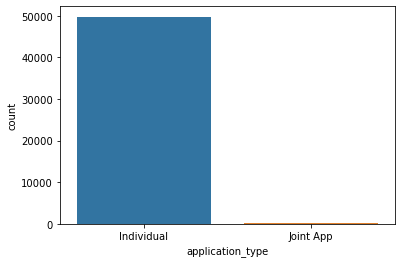

In [338]:
sns.countplot(df['application_type'])

In [339]:
pd.crosstab(df['application_type'],df['loan_status'])

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
application_type,,,,,,,
Individual,8976,5558,1,34847,99,38,245
Joint App,51,52,0,131,1,0,1
